## Implementation
This kernel uses multiple classification algorithms as below
<ul>
    <li>Multi-layer Perceptron classifier (MLP) - Neural Networks</li>
    <li>KNeighborsClassifier - Instance-Based Learning</li>
    <li>AdaBoostClassifier - Ensemble Learning</li>
    <li>BaggingClassifier - Ensemble Learning</li>
    <li>GradientBoostingClassifier - Ensemble Learning</li>
    <li>RandomForestClassifier - Ensemble Learning</li>
</ul>
    
Also this kernel does lot of indepth EDA like 
<ul>
    <li>univariate analysis</li>
    <li>bivariate analysis</li>
    <li>correlation analysis</li>
</ul>

This kernel utilize the below methods for evaluation of model accuracy
<ul>
    <li>auc</li>
    <li>classification report</li>
    <li>confusion matrix</li>
</ul>

## General Library Imports

In [1]:
#  Install the Matplotlib library using pip as the Python package manager.
!pip install matplotlib

In [2]:
#  Install the Tensorflow library using pip as the Python package manager.
!pip install tensorflow

In [3]:
# Import the necessary modules
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys

# ChatGPT - DL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# libraries for models
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression

# Libraries for Metrics evaluation
from sklearn.metrics import auc, classification_report, confusion_matrix, roc_curve, RocCurveDisplay

## Data loading

In [4]:
project_data = pd.read_csv("./dataset/Employee Analysis Attrition Report/HR Employee Attrition.csv")

##  Analysis of the Data

In [5]:
project_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
project_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
project_data.shape

(1470, 35)

In [9]:
project_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
project_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## Eploratory Data Analysis

### uivariate Analysis

In [11]:
numeric_columns = [column for column in project_data.columns if project_data[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


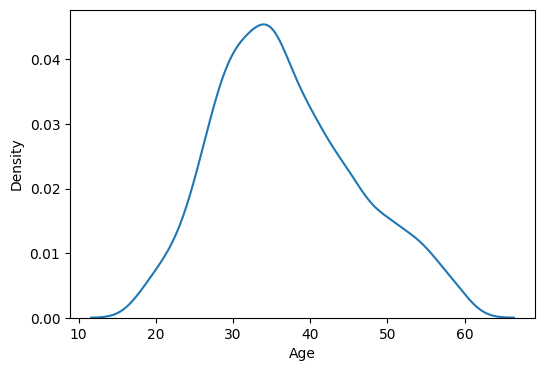

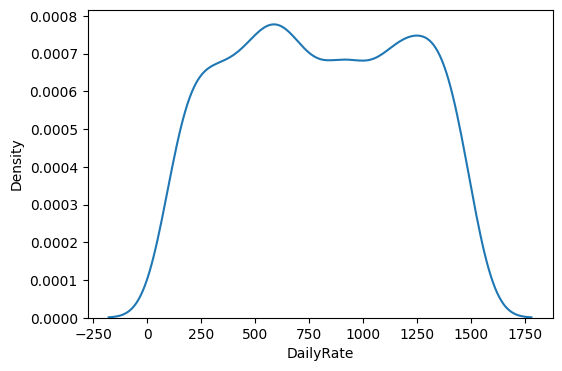

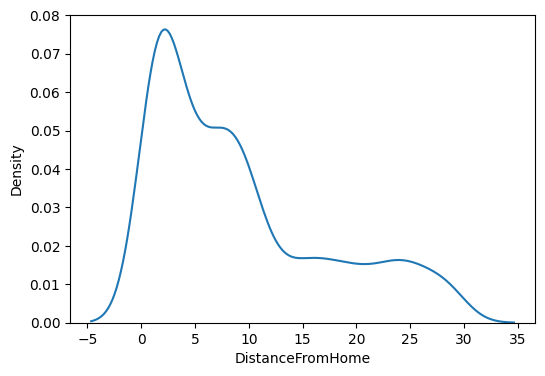

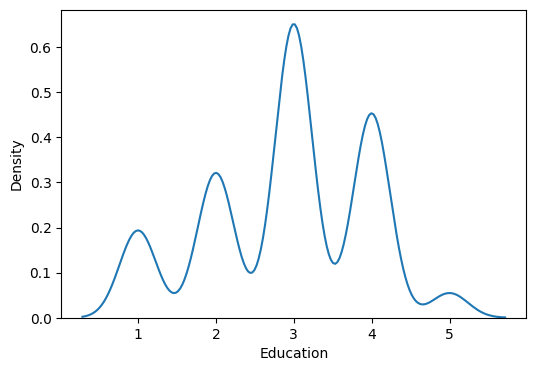

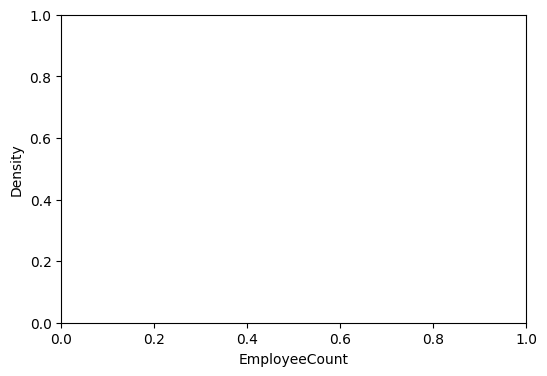

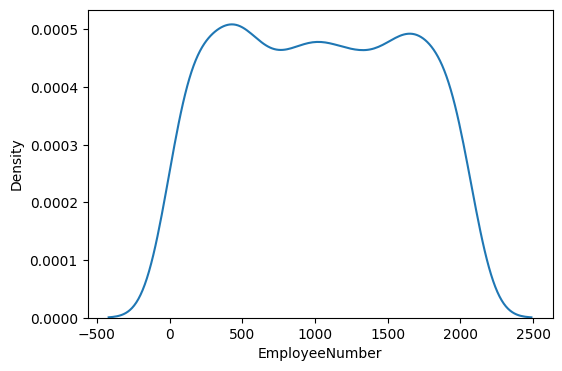

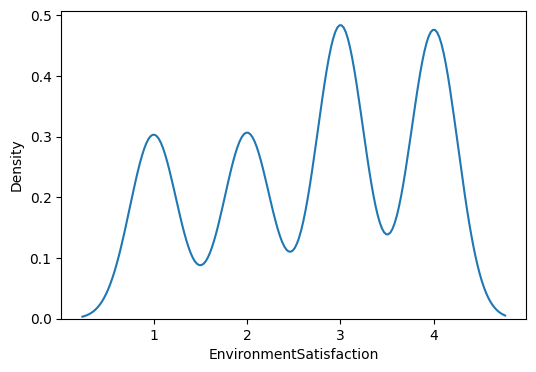

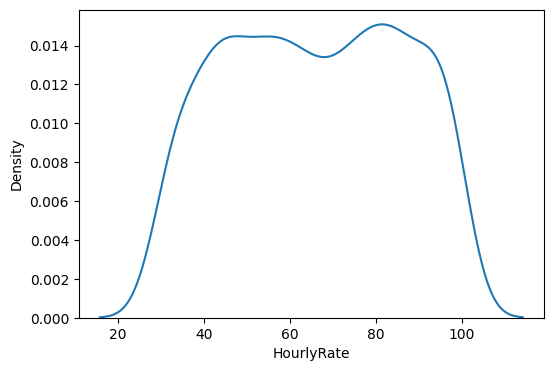

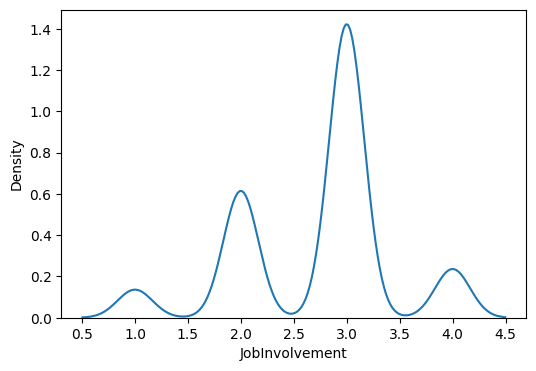

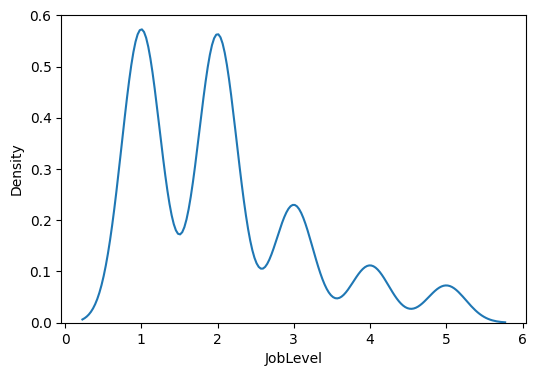

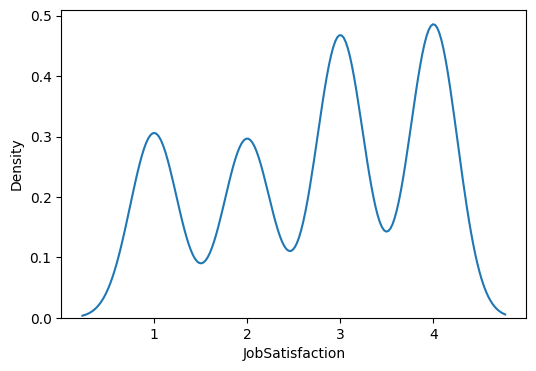

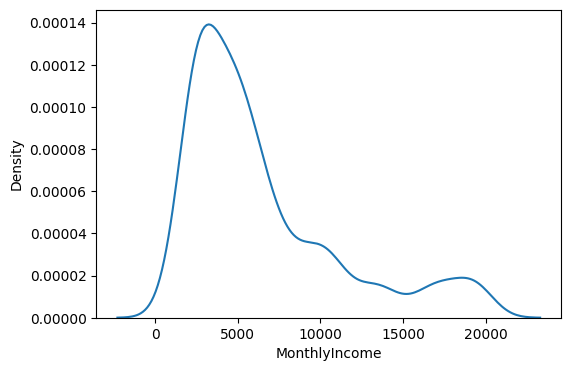

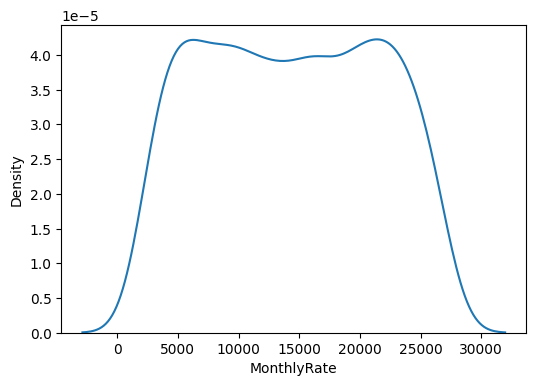

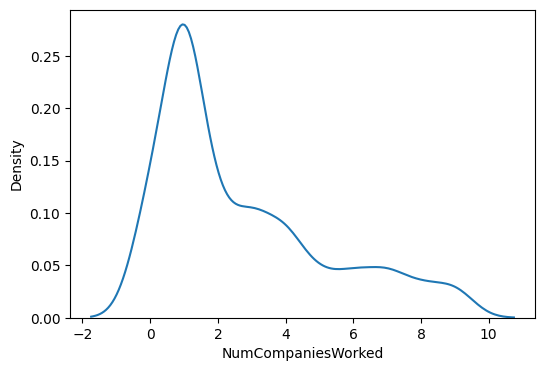

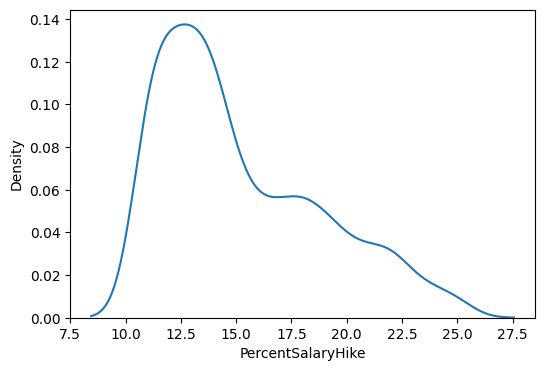

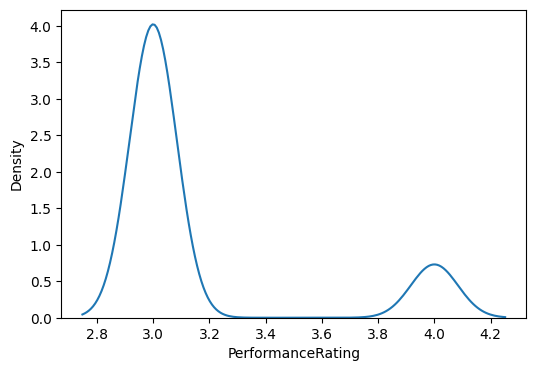

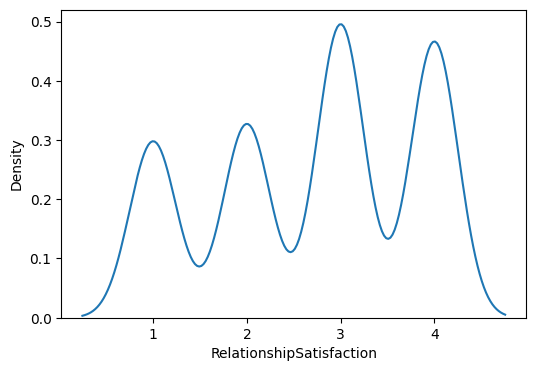

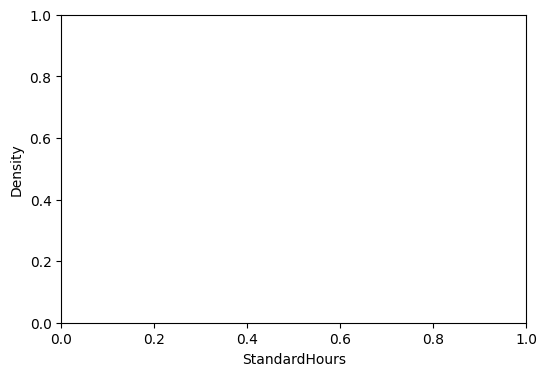

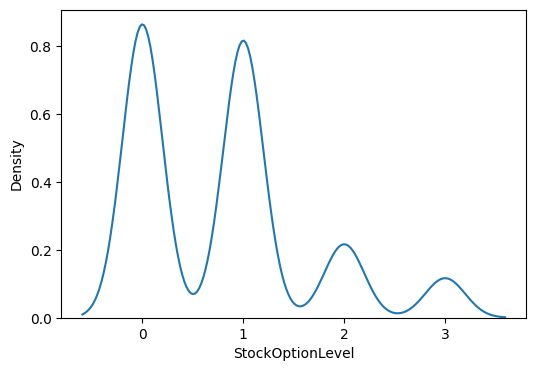

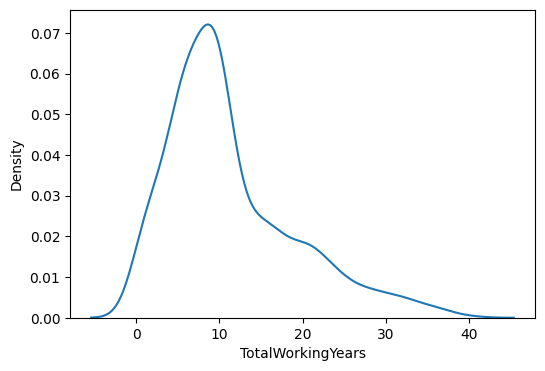

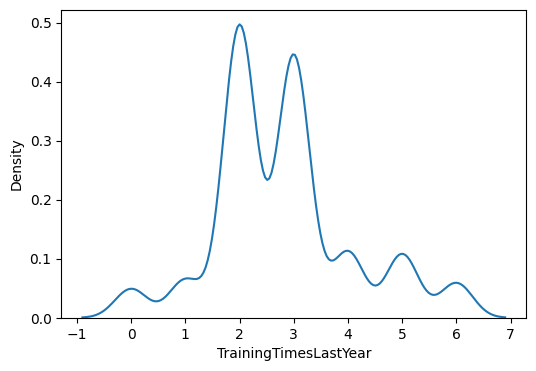

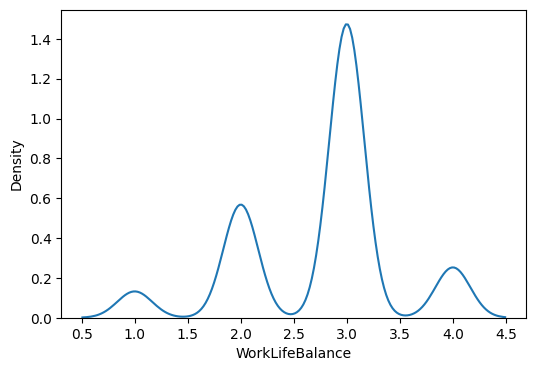

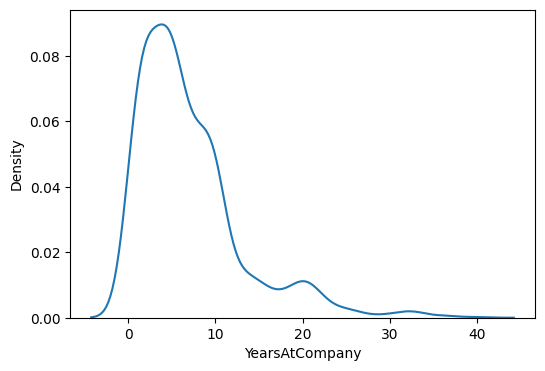

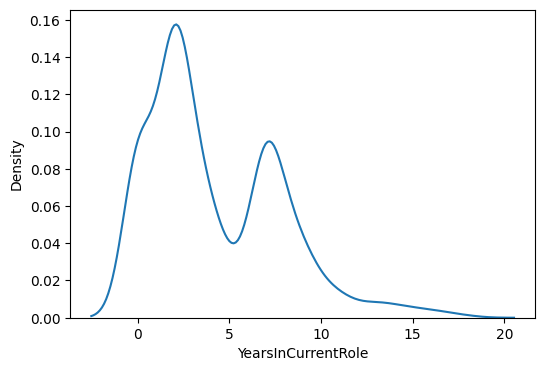

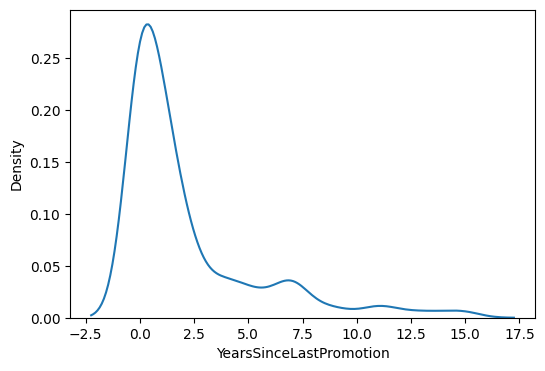

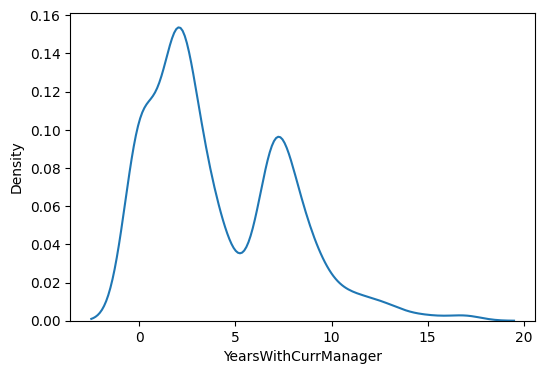

In [12]:
for column in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=project_data, x=column, palette="crest")
    plt.show()

In [13]:
categorical_columns = [column for column in project_data.columns if project_data[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


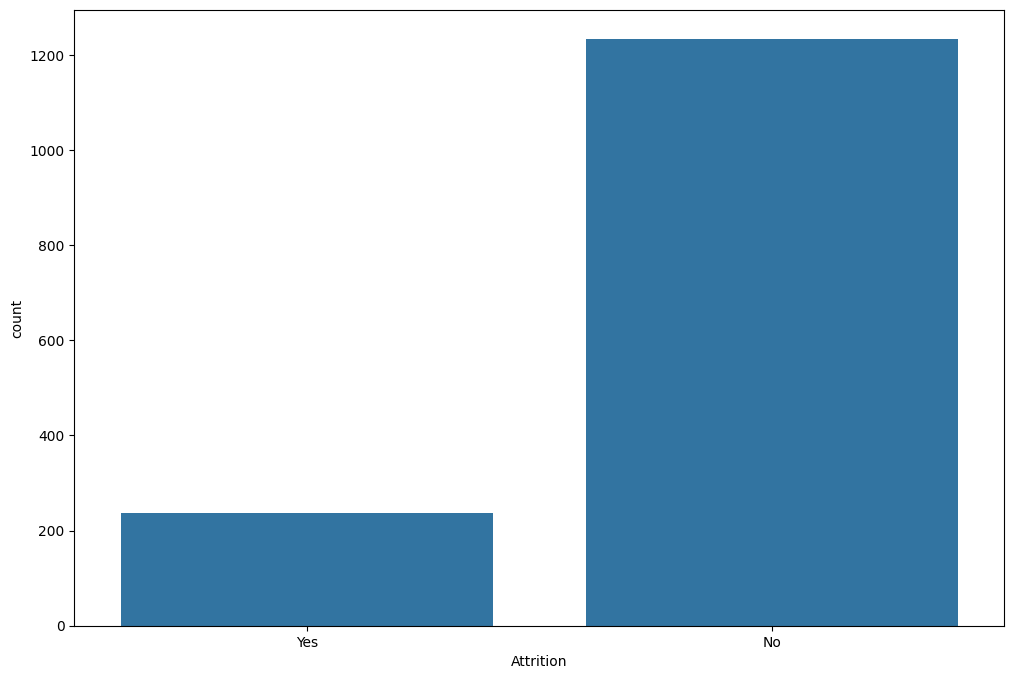

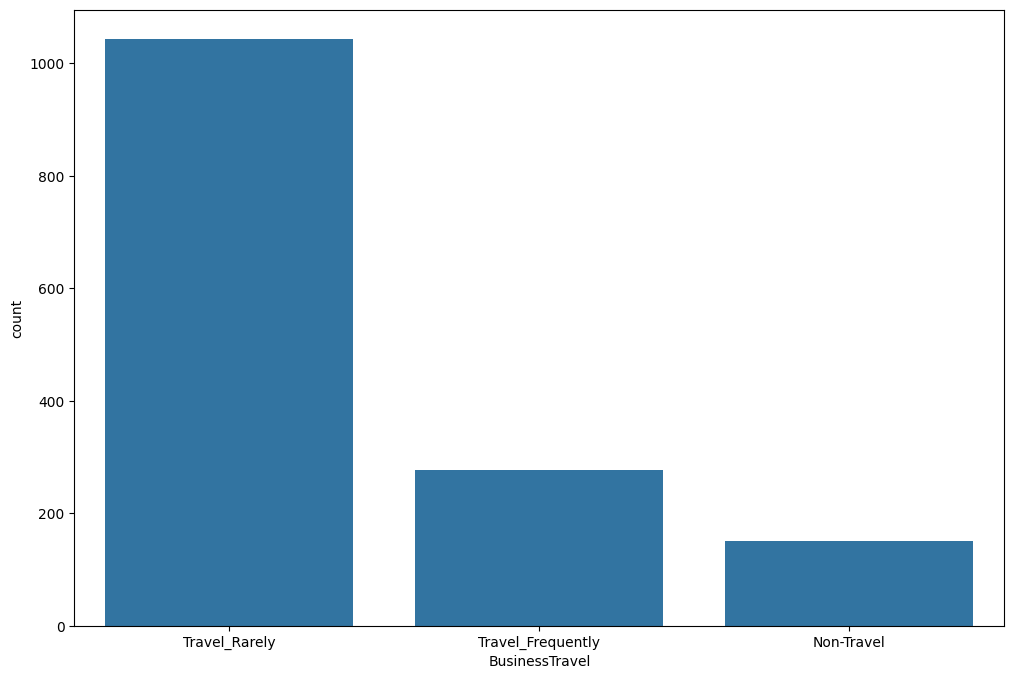

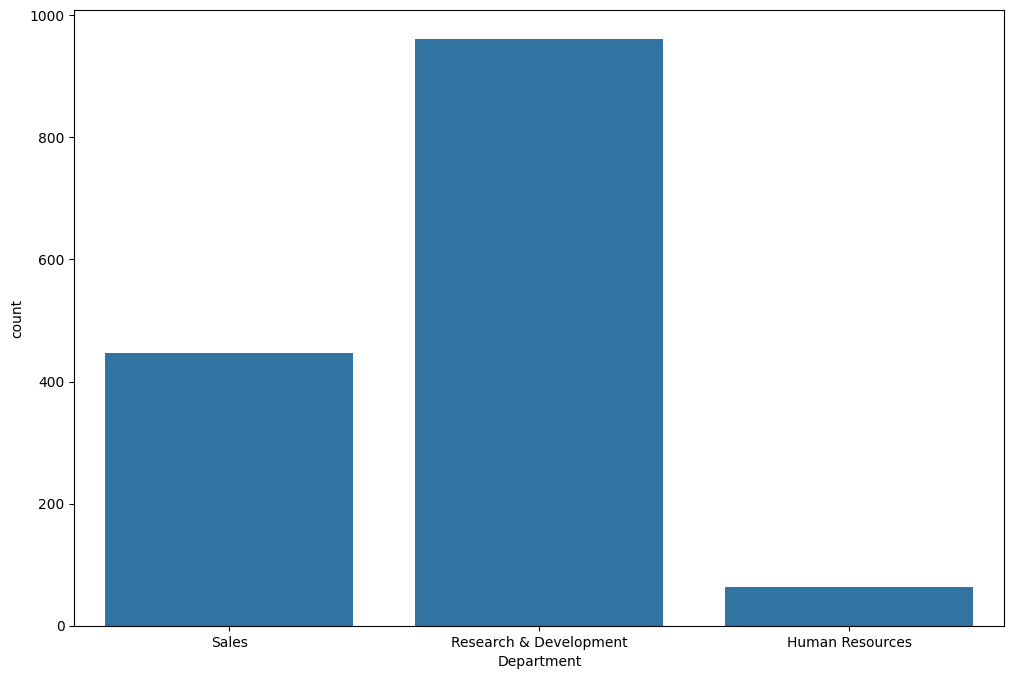

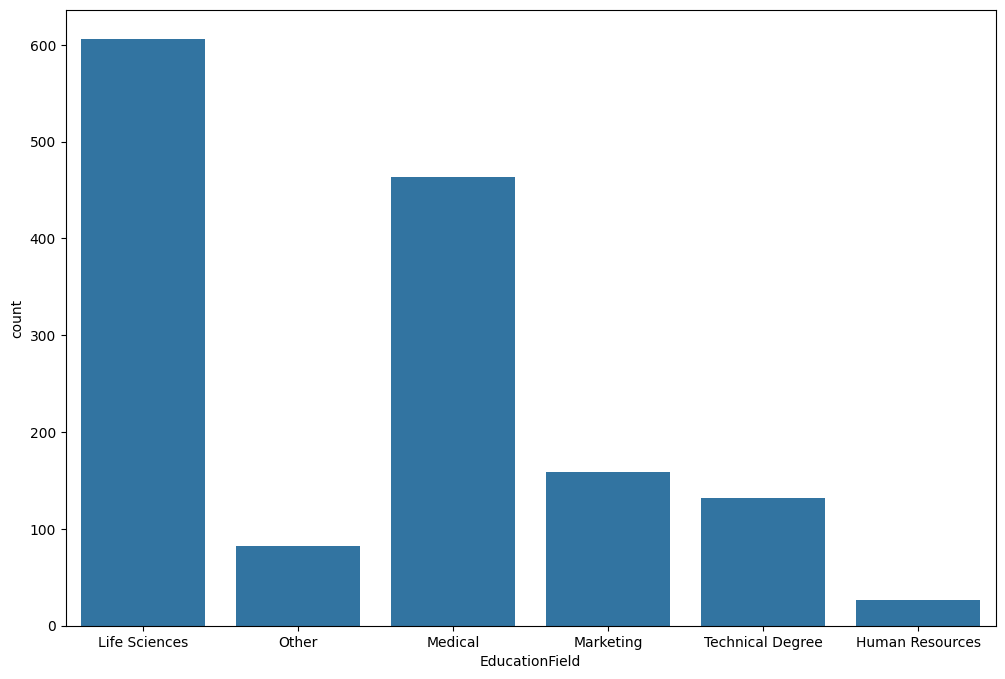

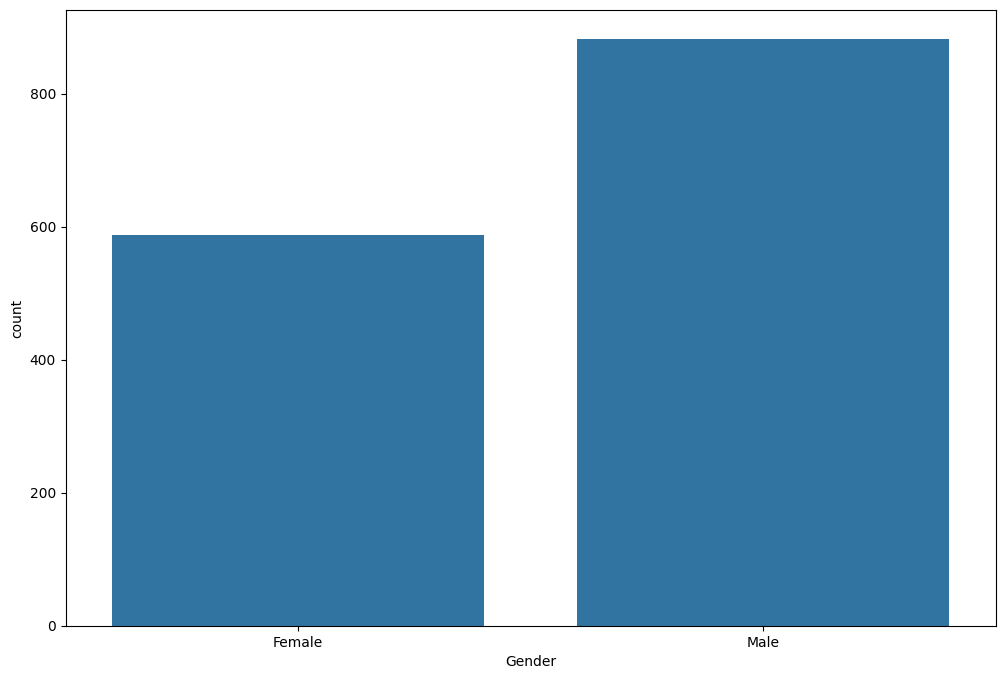

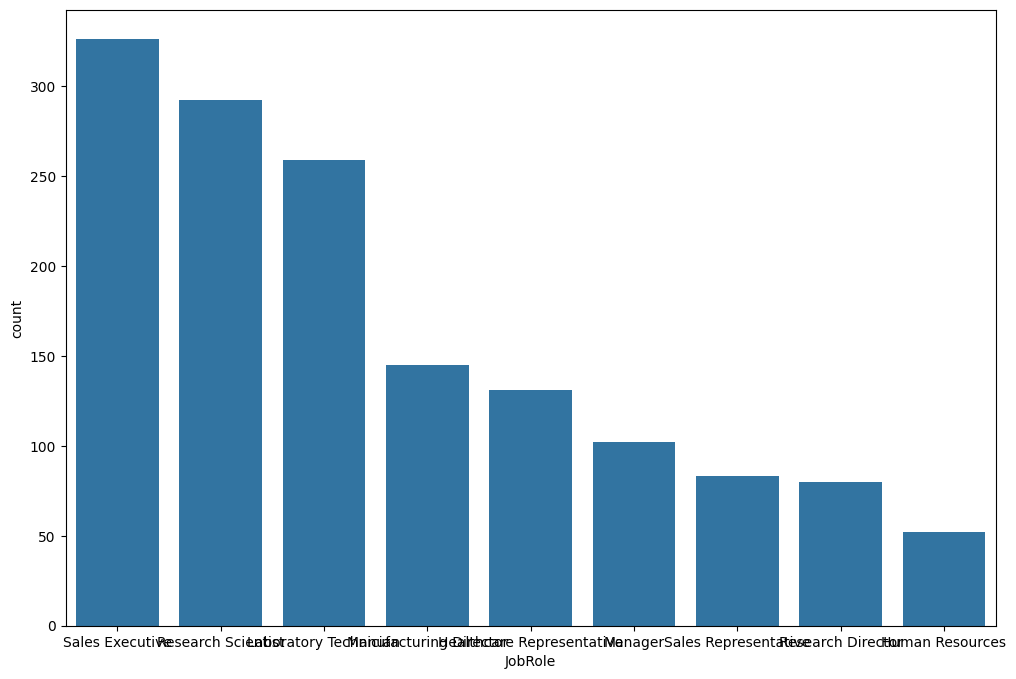

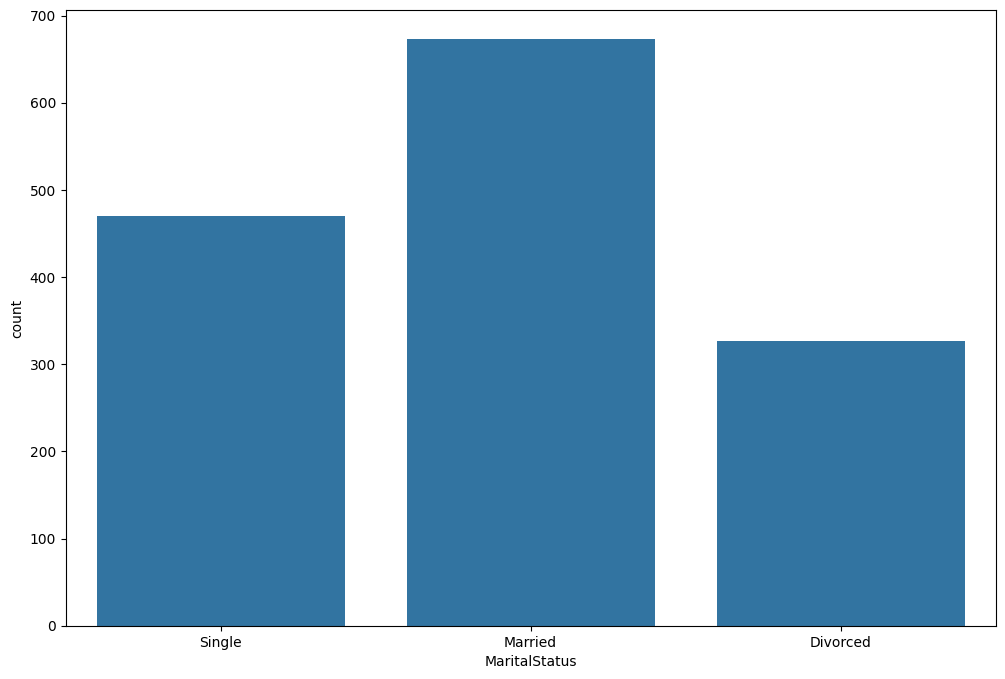

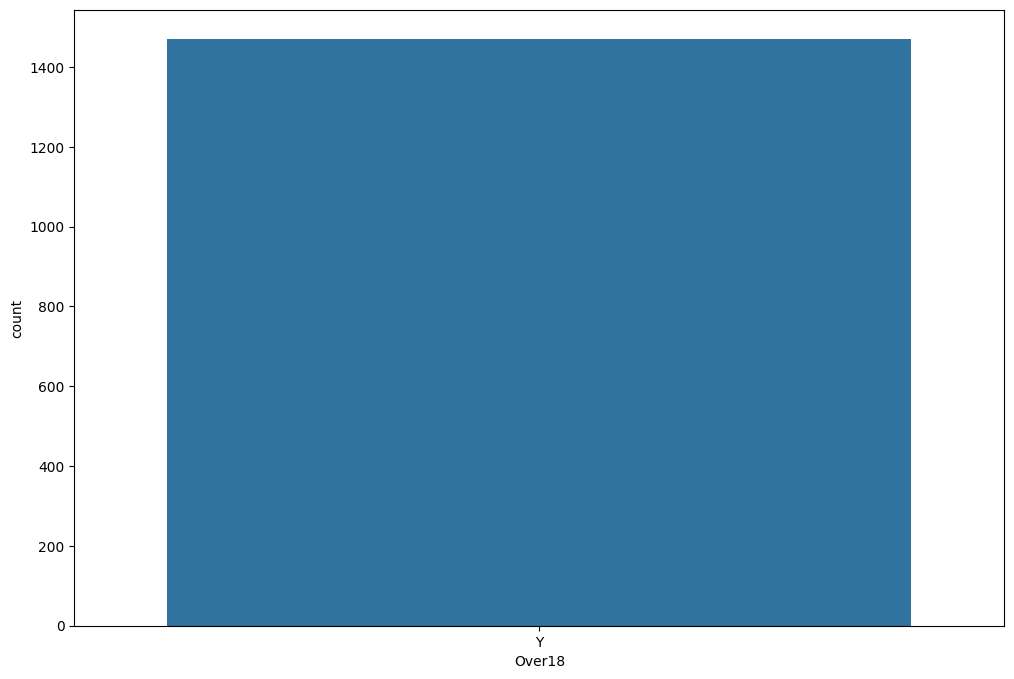

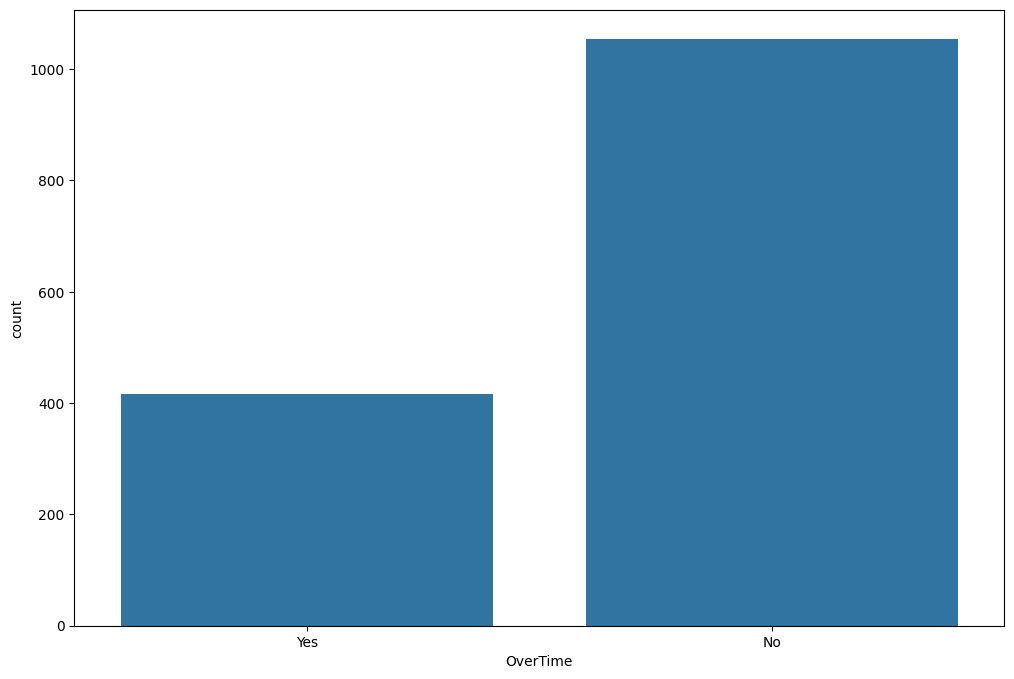

In [14]:
for column in categorical_columns:
    plt.figure(figsize=(12,8))
    sns.countplot(x=project_data[column])
    plt.show()

### Bivariate Analysis

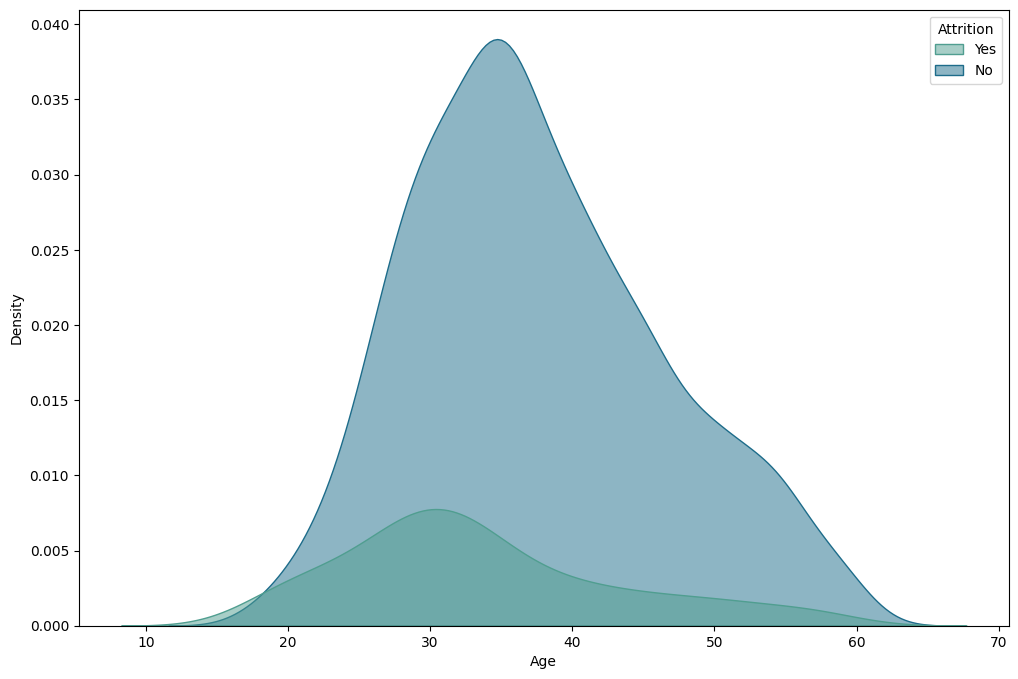

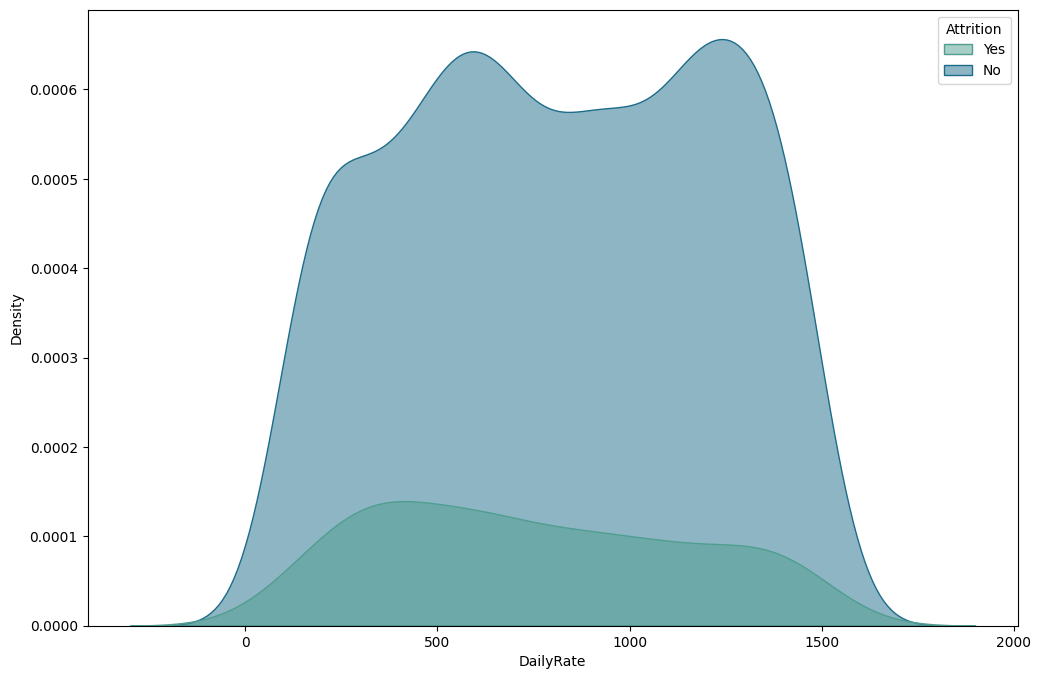

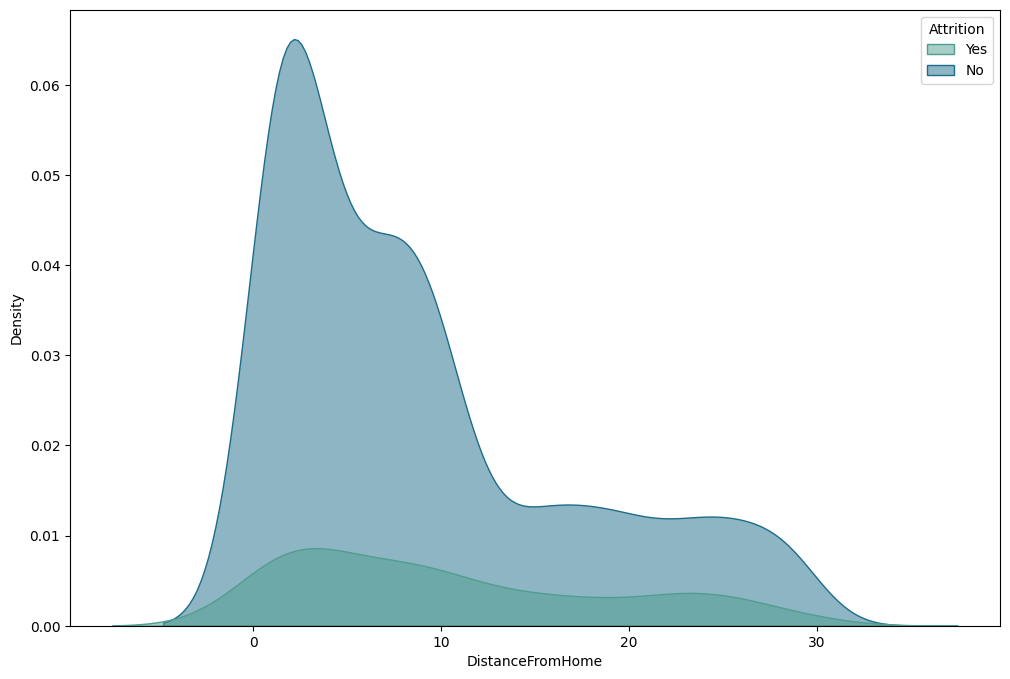

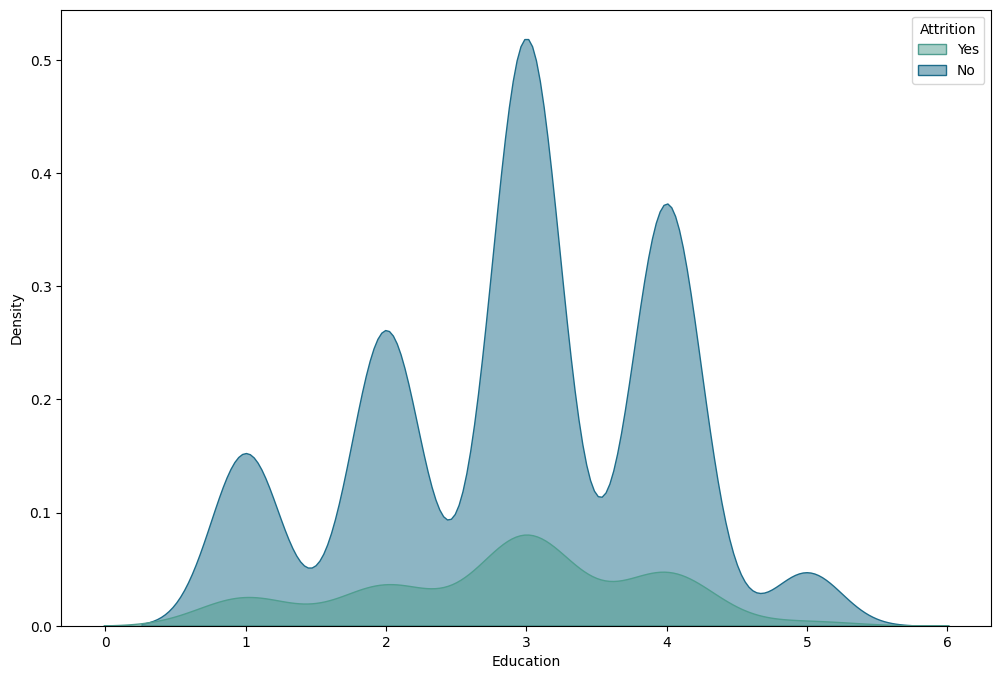

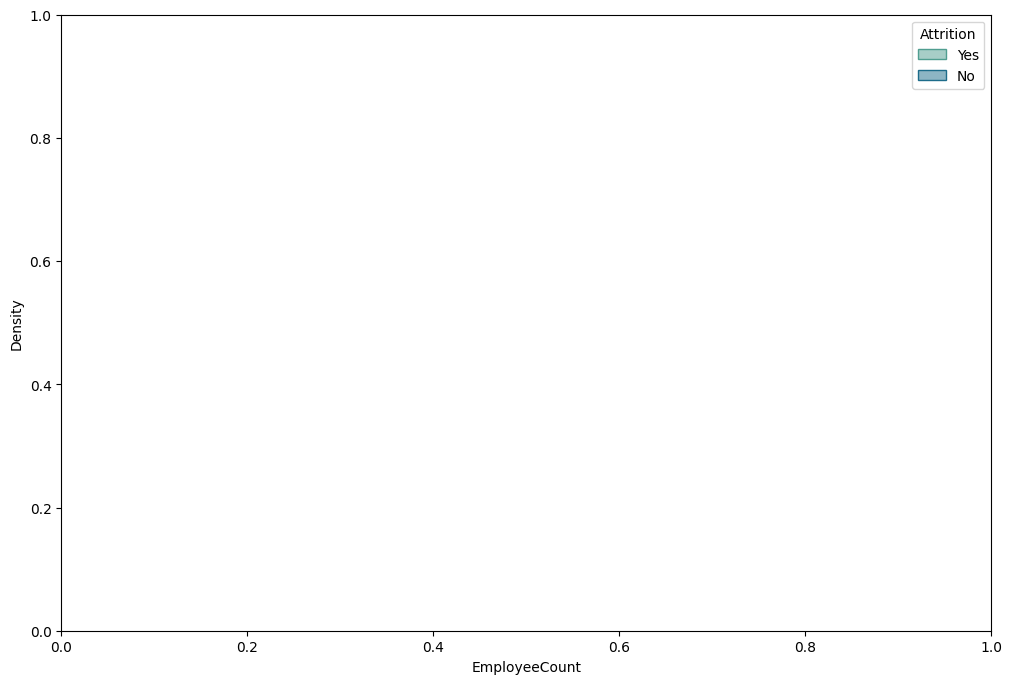

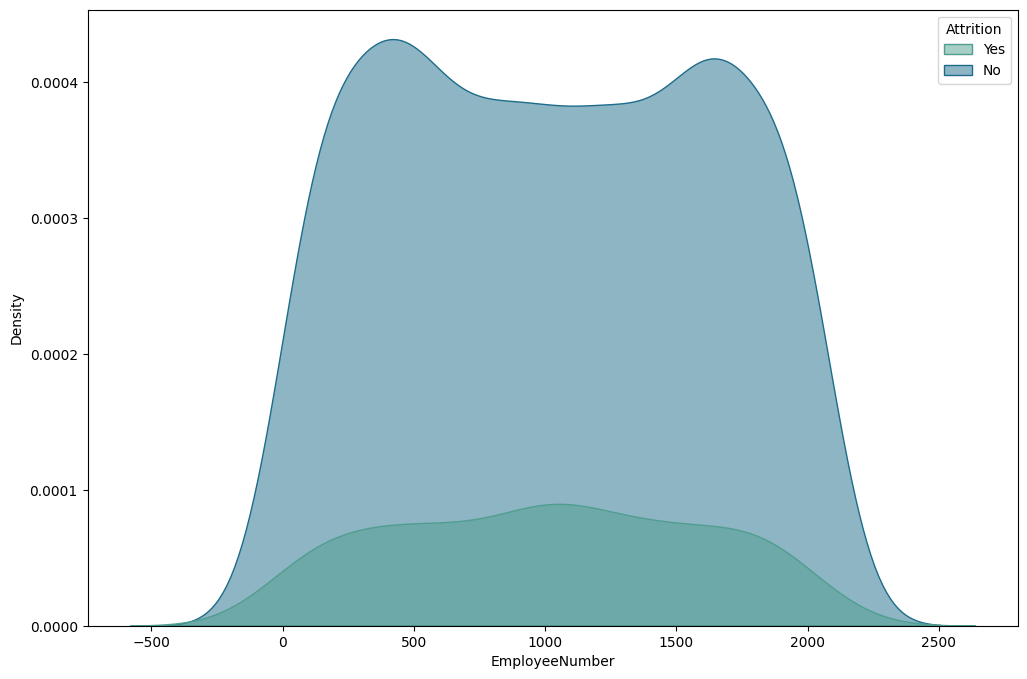

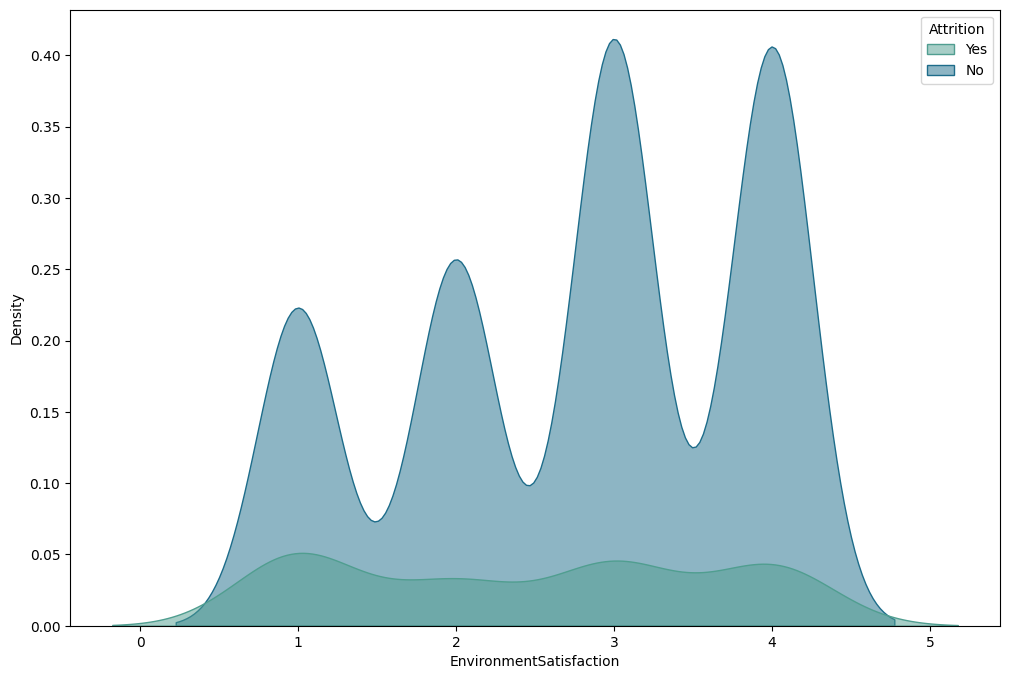

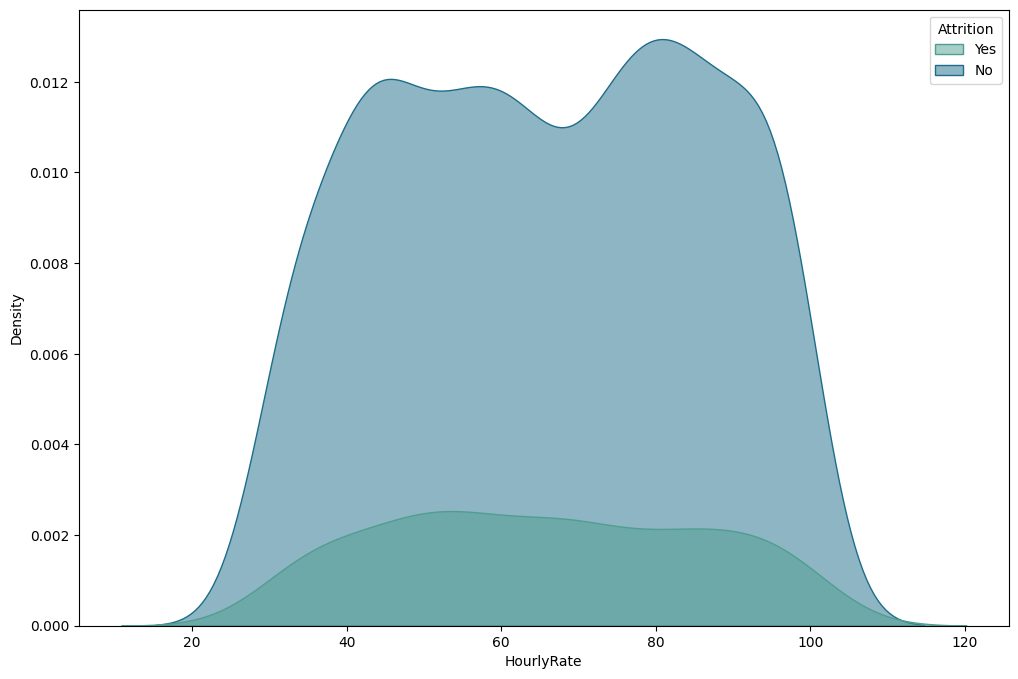

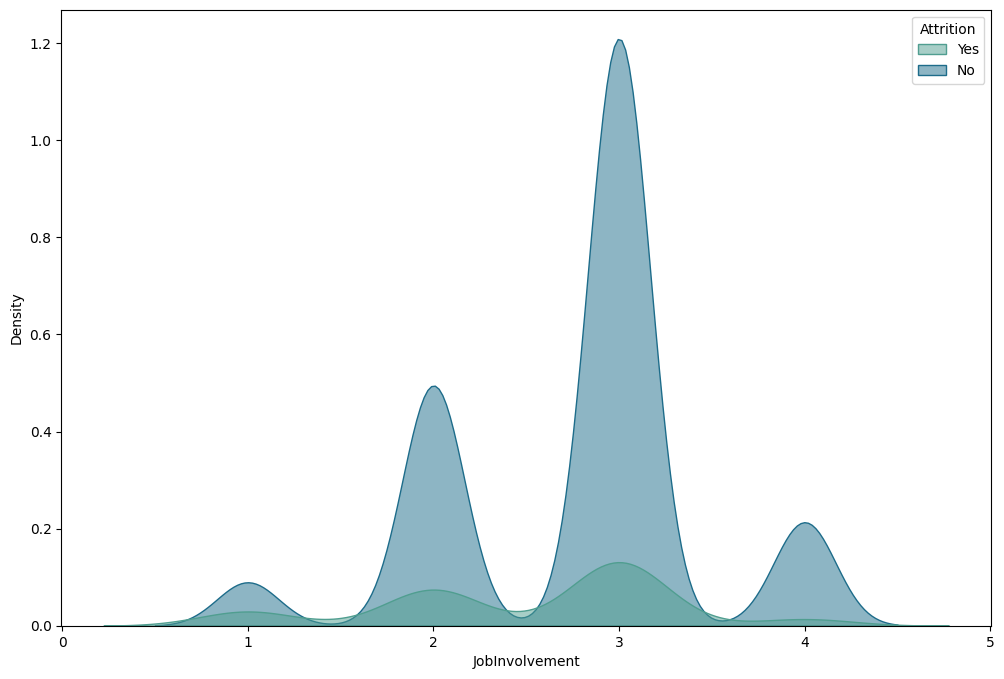

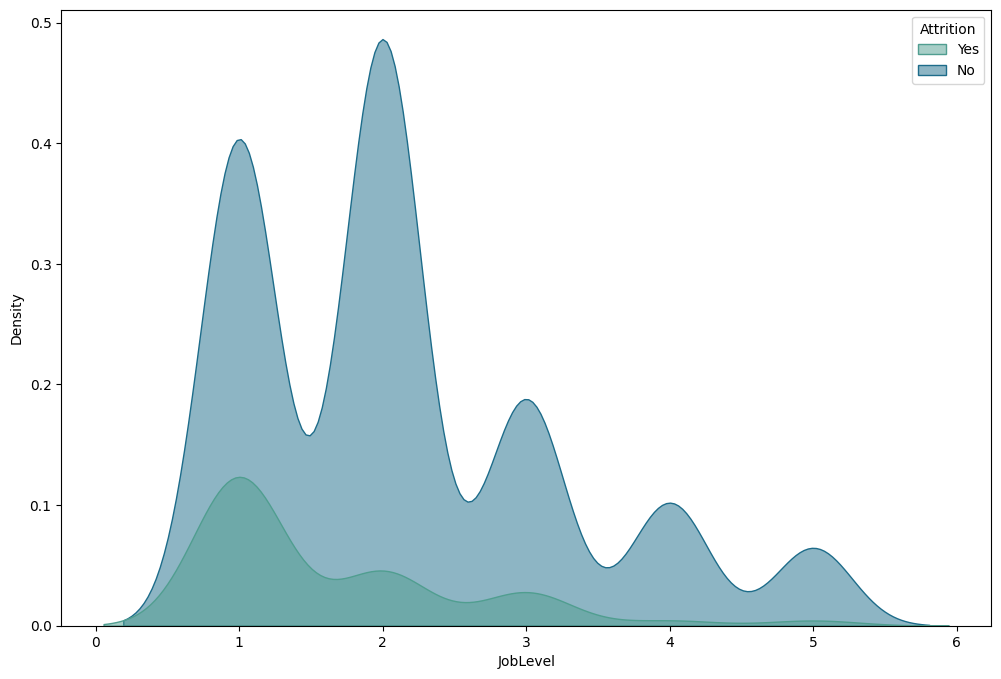

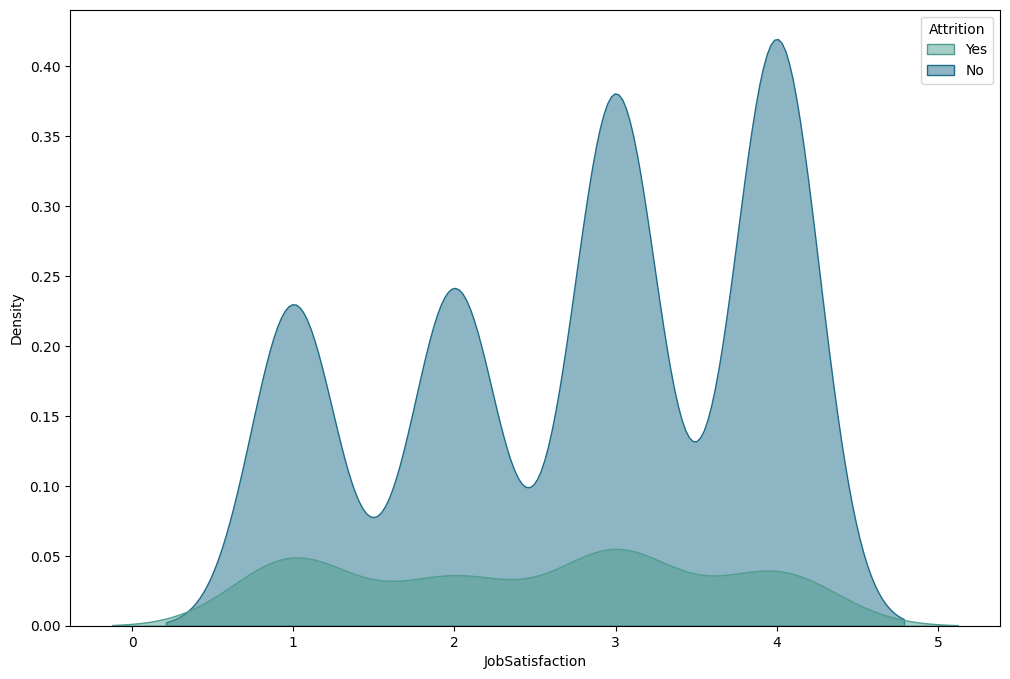

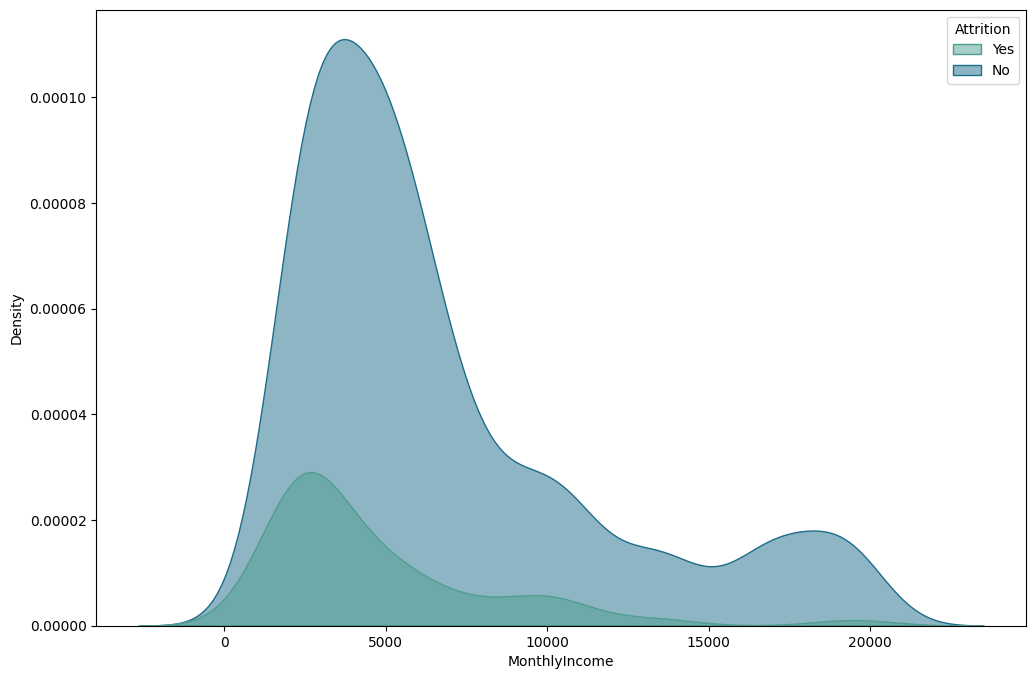

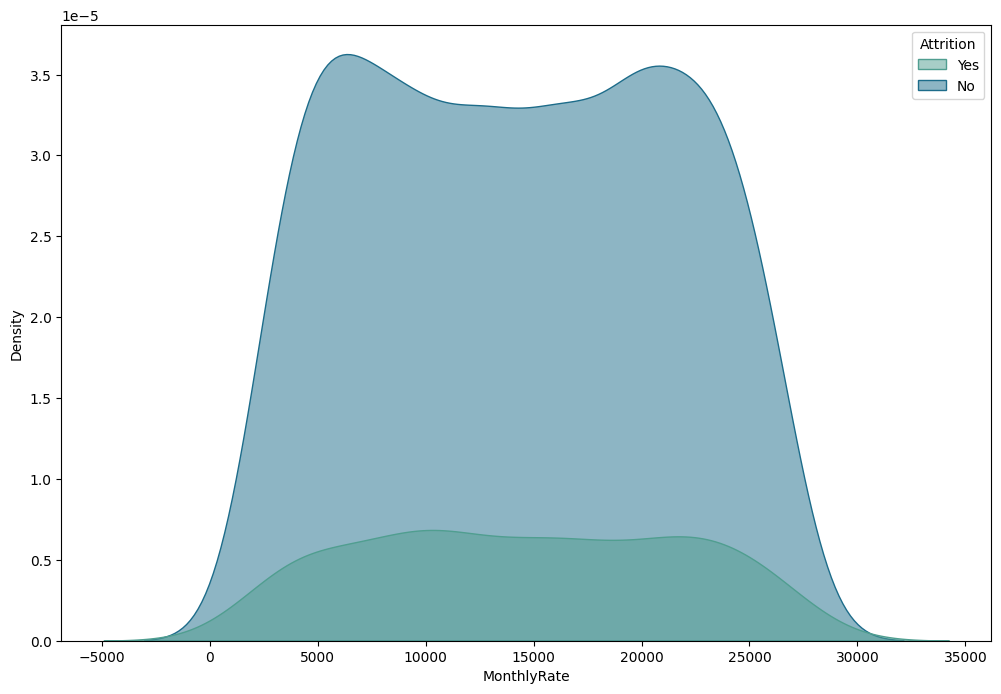

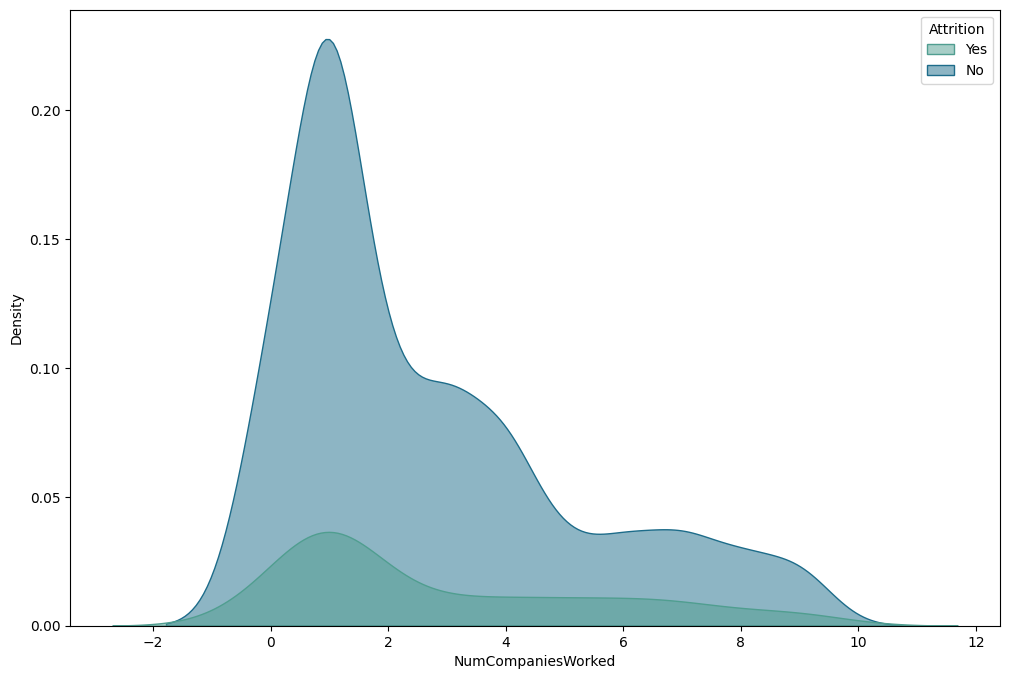

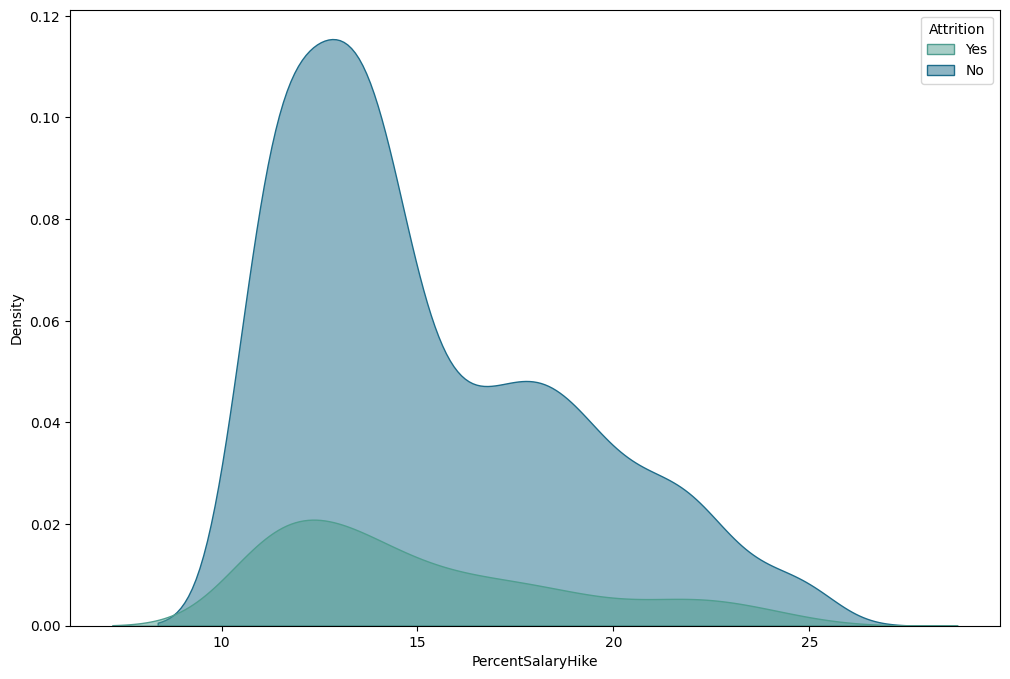

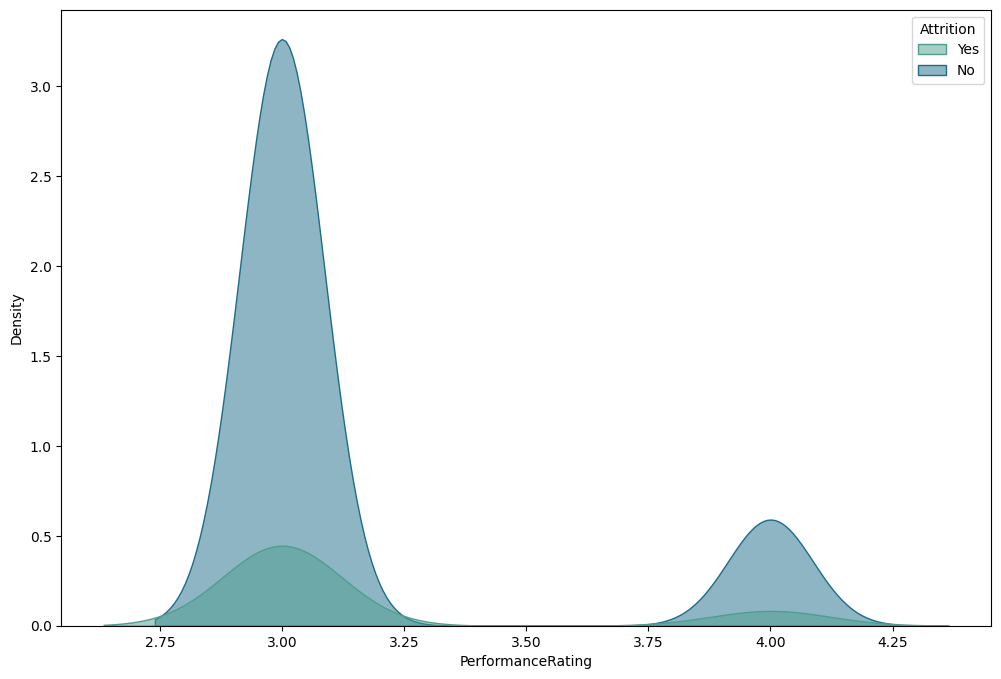

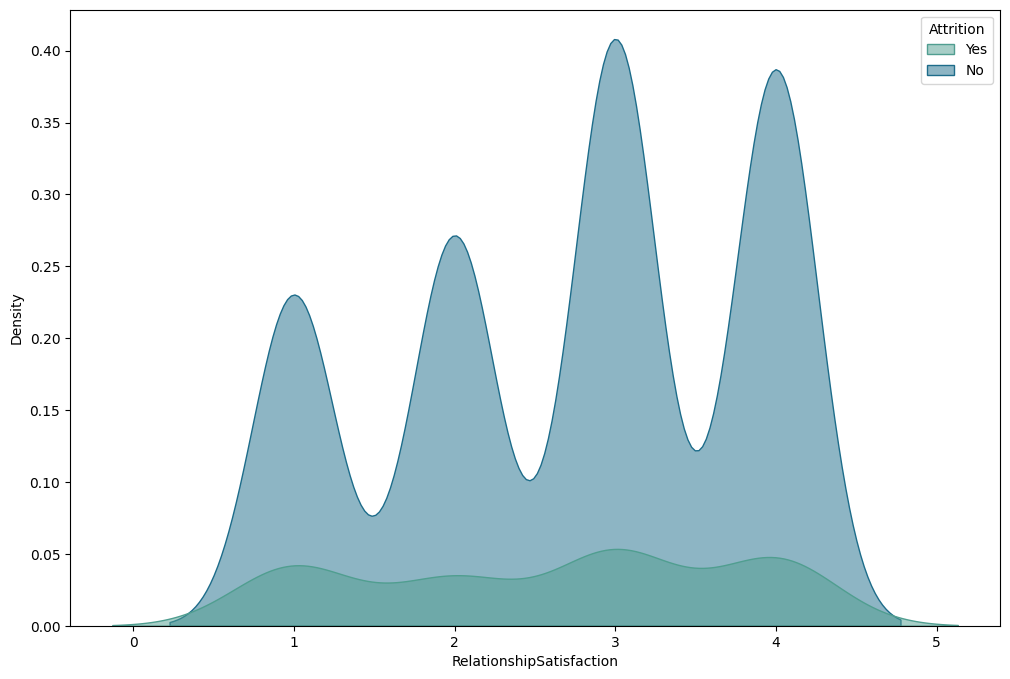

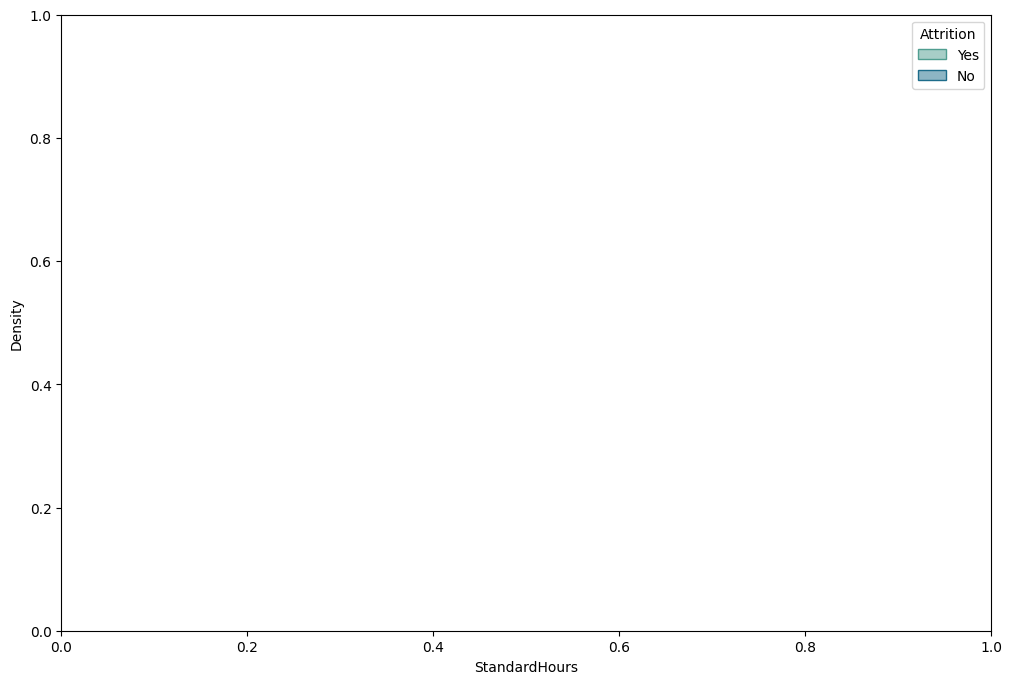

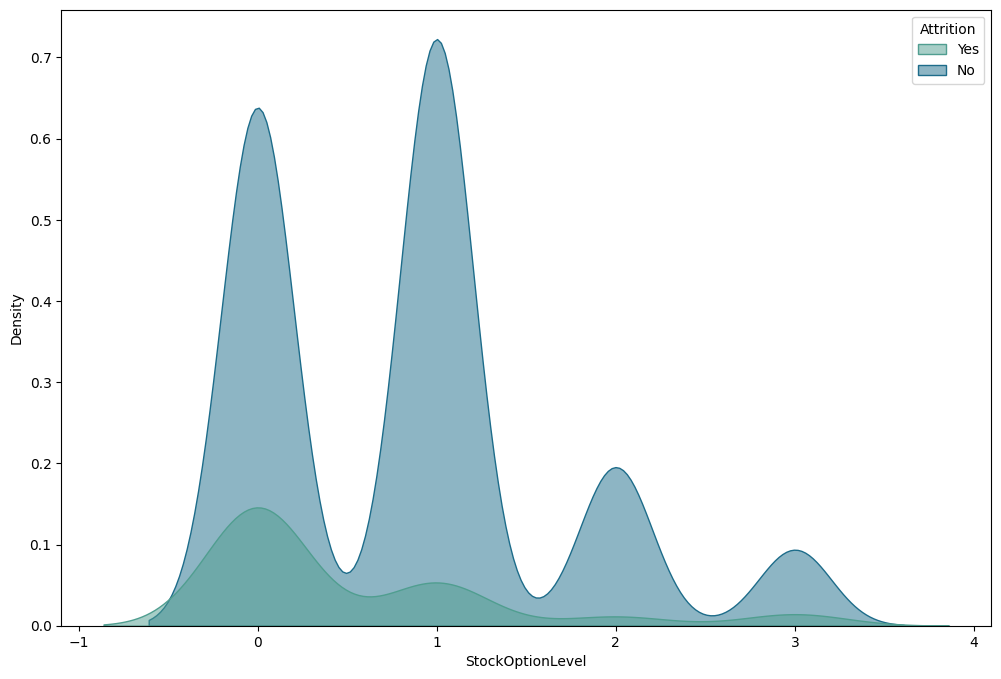

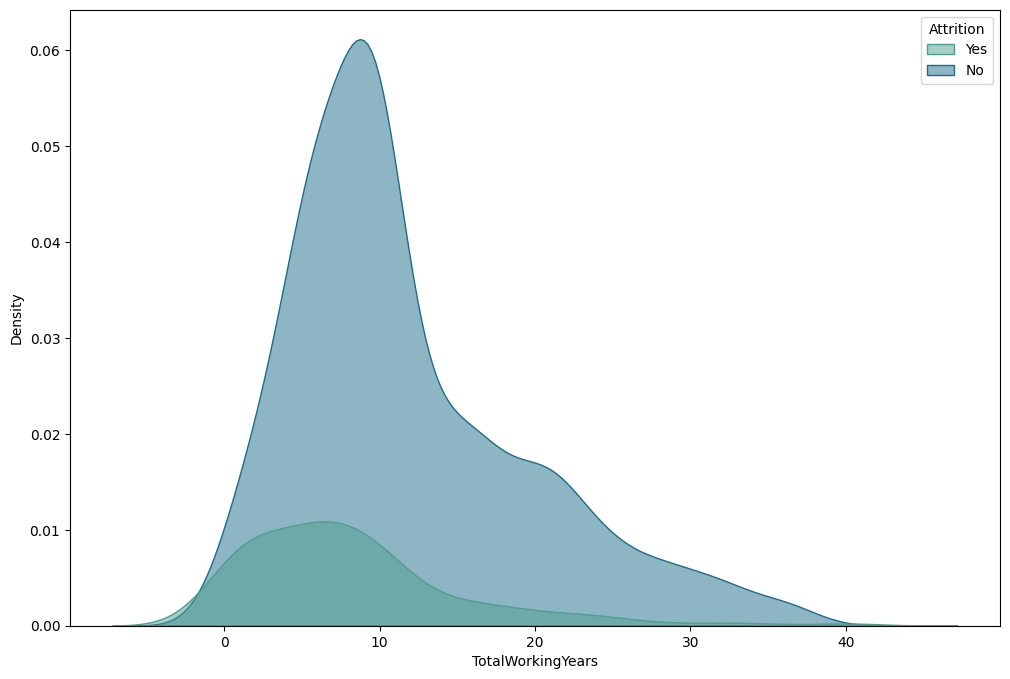

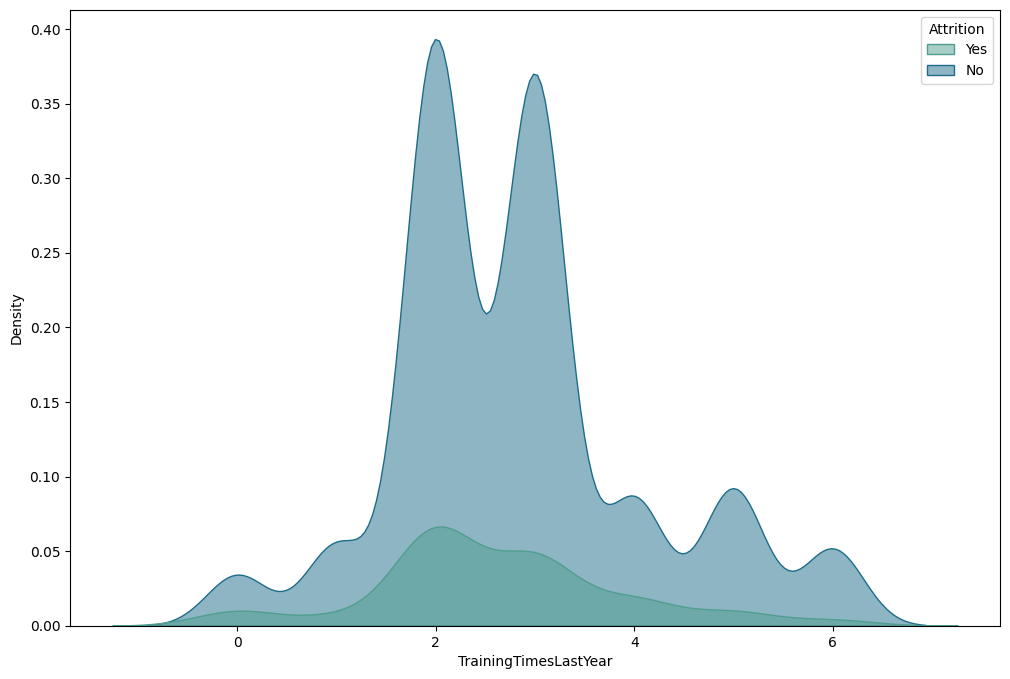

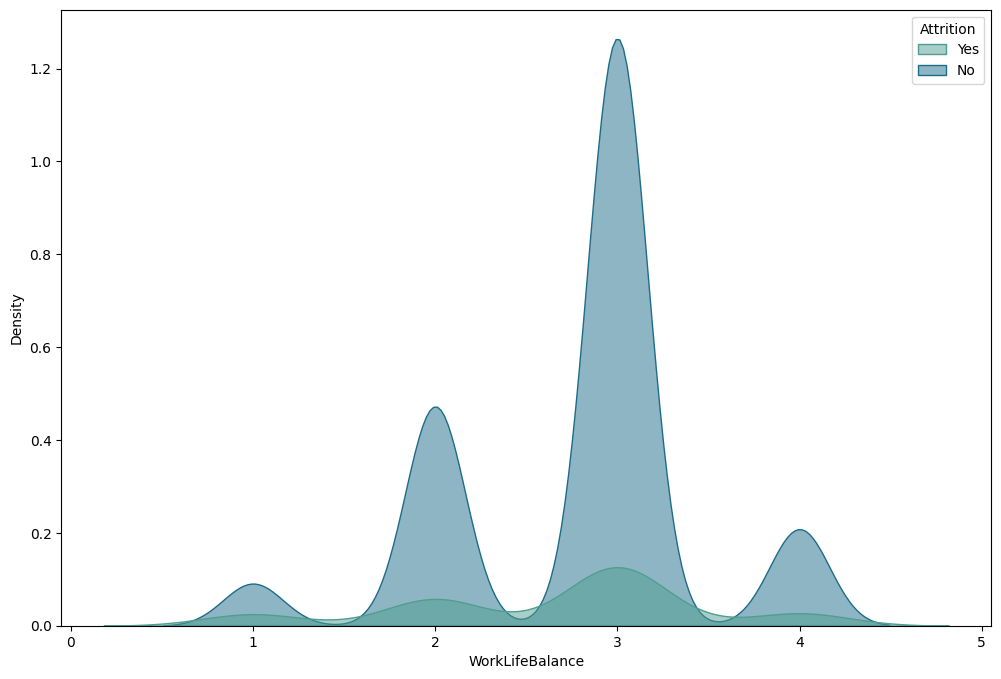

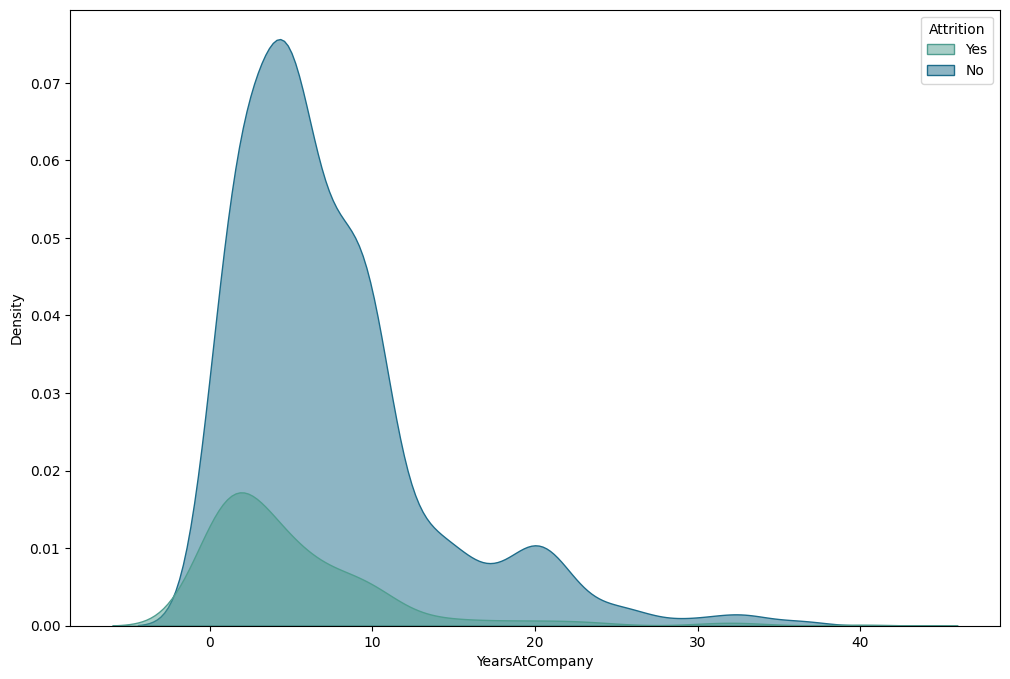

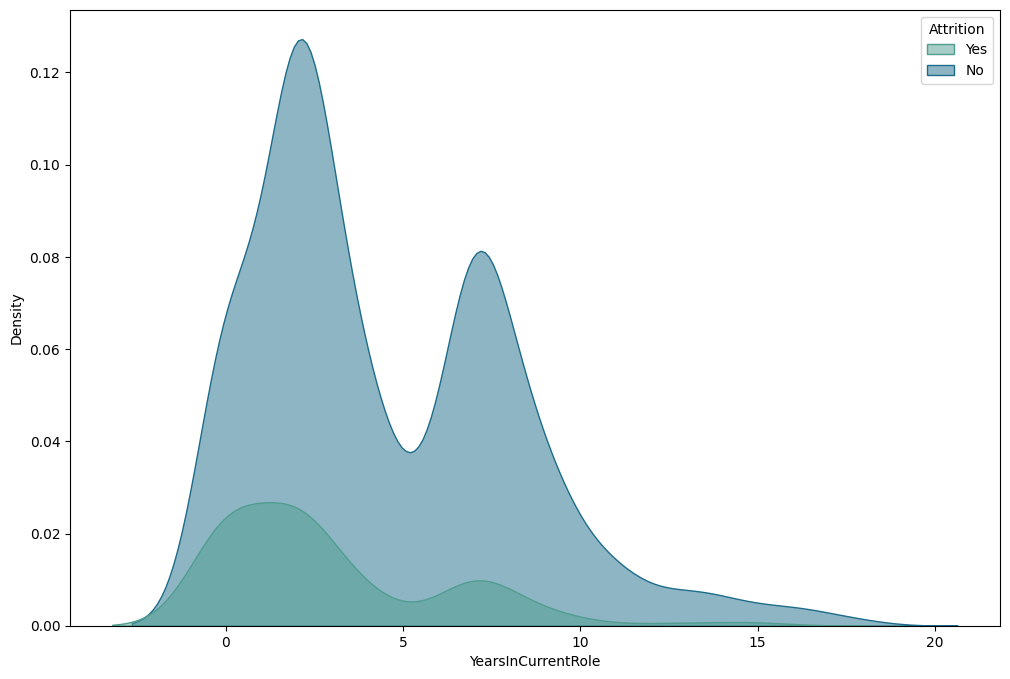

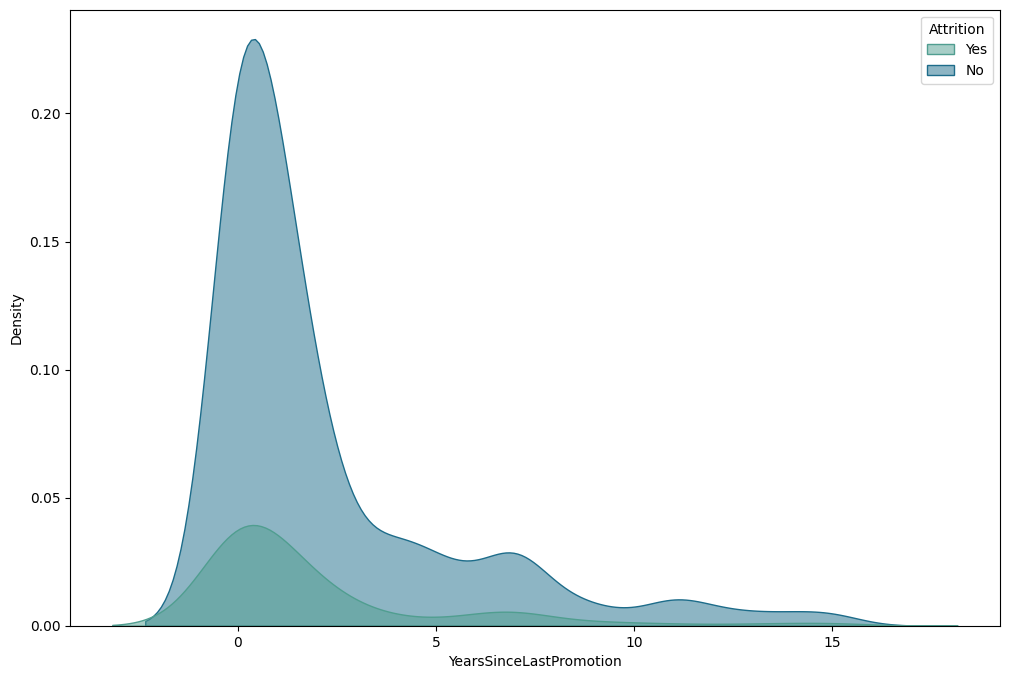

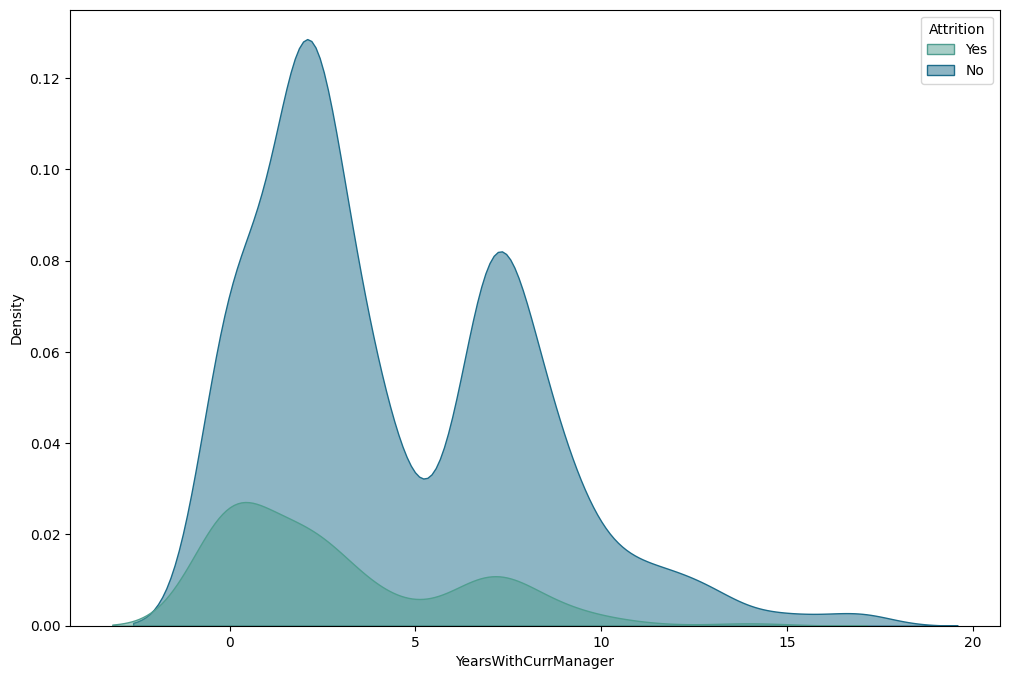

In [15]:
for column in numeric_columns:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=project_data, x=column, hue="Attrition", fill=True, alpha=.5, palette="crest")
    plt.show()

## Correlation Analysis

<Axes: >

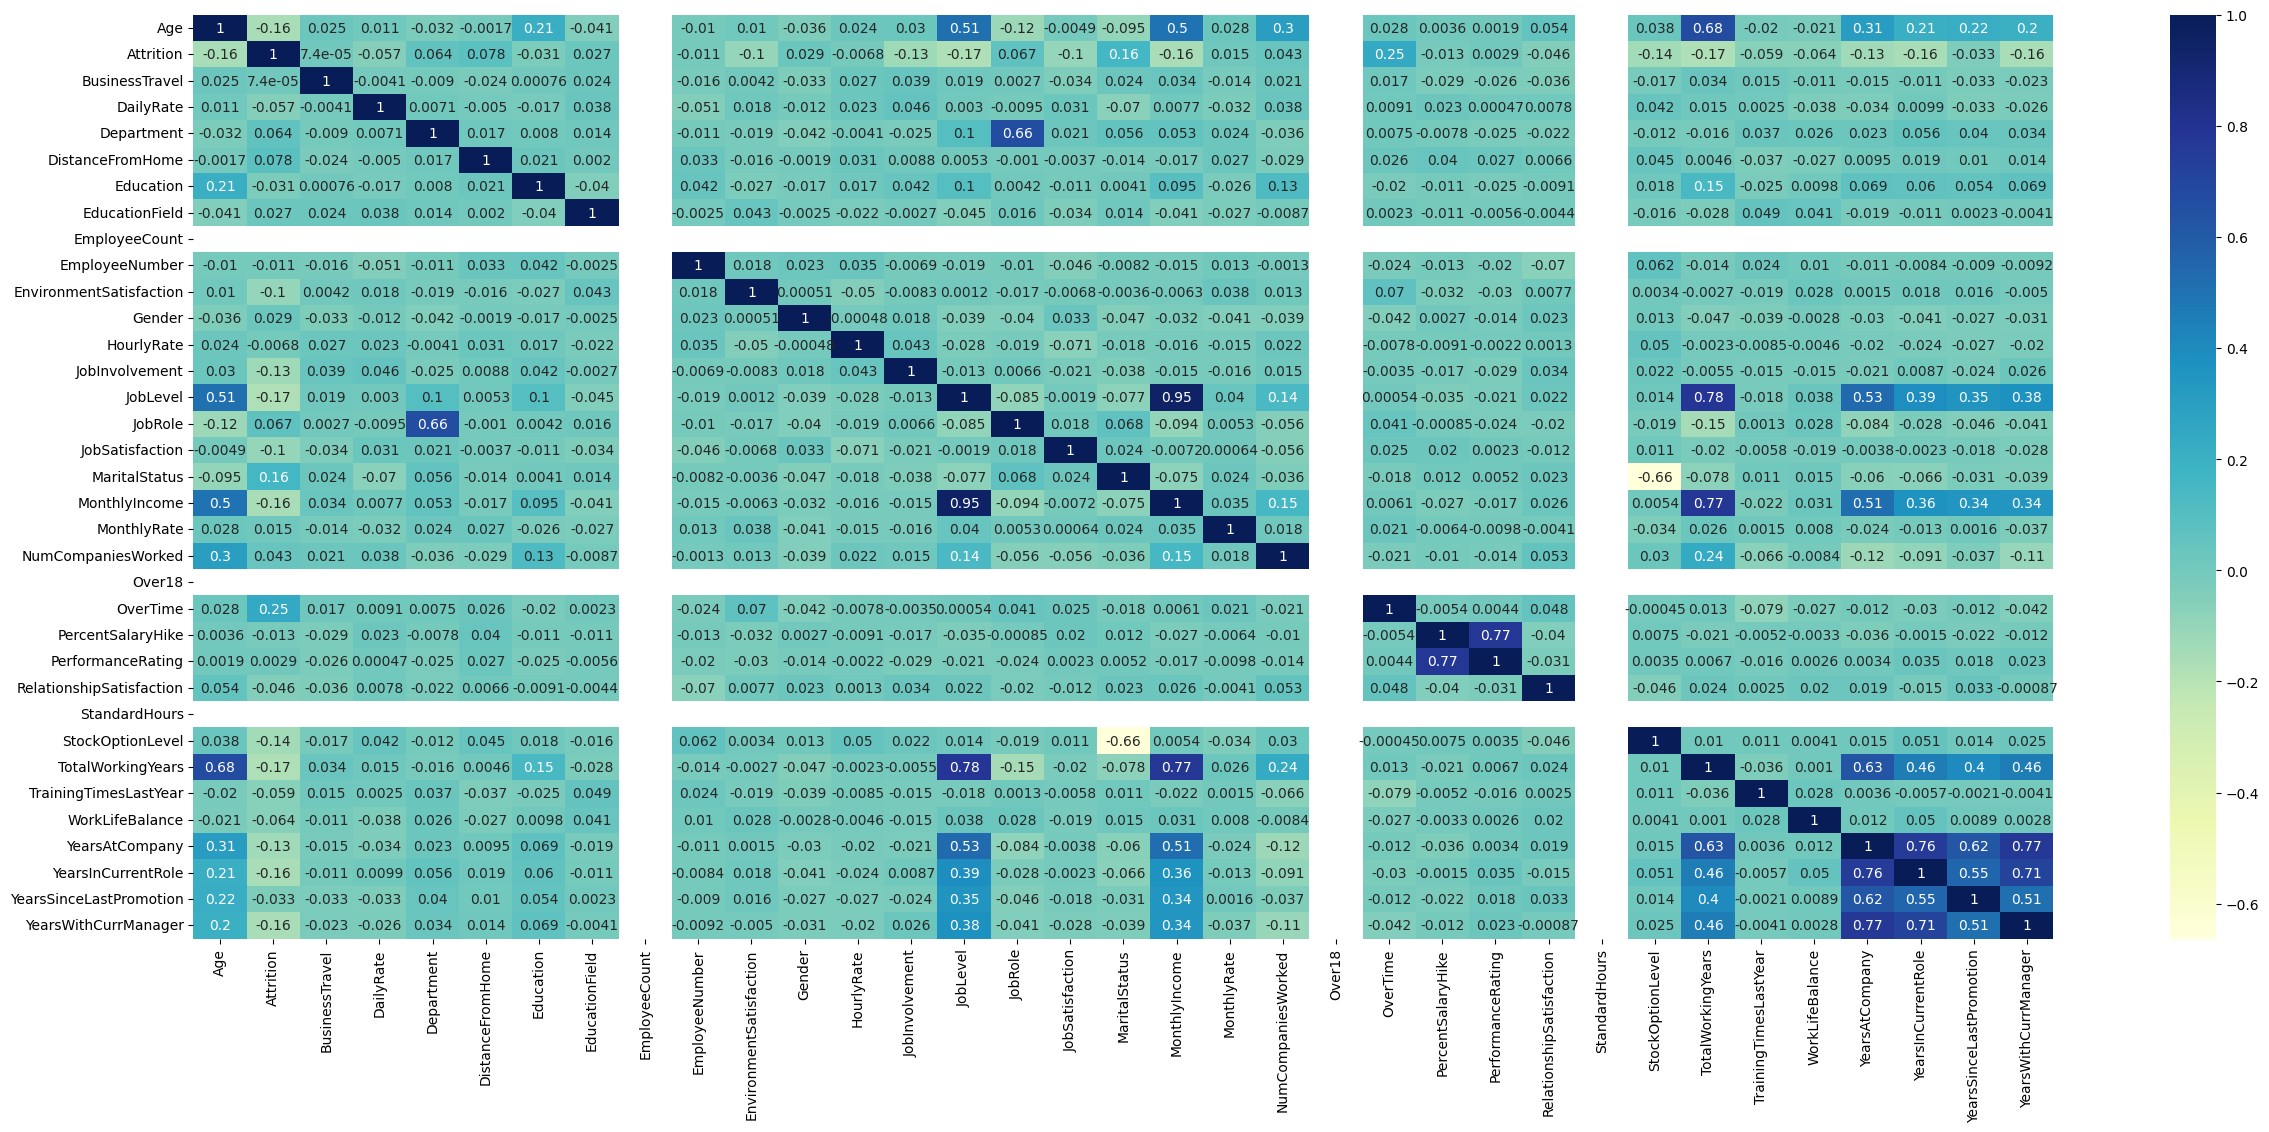

In [16]:
df1 = project_data.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Data Preprocessing and Pipelining

In [17]:
X_train=project_data.drop(columns=["Attrition"])
y_train=project_data["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

In [18]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (1029, 34)
Test dataset shape (1029,)


In [19]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************************************
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


In [20]:
numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRat...
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])

## Generic Methods for Model Preparation & Metric Evaliation

In [21]:
def prepare_model(name, algorithm):
    
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])

    model.fit(X_train, y_train)
    
    # Save
    filename = "Employee Analysis Attrition Report - "+ name +'.pkl'
    print(filename)
    # with open('C:/Users/saray/Documents/FYP Code Workspace/model/1. Employee Analysis Attrition Report', 'wb') as f:
    pickle.dump(model, open(filename, 'wb'))

    return model

In [22]:
# Row 1100 - No
input_data1 = {
    "Age": [40],
    "BusinessTravel": ['Non-Travel'],
    "DailyRate": [1142],
    "Department": ['Research & Development'],
    "DistanceFromHome": [8],
    "Education": [2],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [1552],
    "EnvironmentSatisfaction": [4],
    "Gender": ['Male'],
    "HourlyRate": [72],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": ['Healthcare Representative'],
    "JobSatisfaction": [4],
    "MaritalStatus": ['Divorced'],
    "MonthlyIncome": [4069],
    "MonthlyRate": [8841],
    "NumCompaniesWorked": [3],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [18],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [3],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [8],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [2],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [2],
    "YearsWithCurrManager": [2]
}

# Row 999 - Yes
input_data2 = {
    "Age": [27],
    "BusinessTravel": ['Travel_Rarely'],
    "DailyRate": [135],
    "Department": ['Research & Development'],
    "DistanceFromHome": [17],
    "Education": [4],
    "EducationField": ['Life Sciences'],
    "EmployeeCount": [1],
    "EmployeeNumber": [1405],
    "EnvironmentSatisfaction": [4],
    "Gender": ['Female'],
    "HourlyRate": [51],
    "JobInvolvement": [3],
    "JobLevel": [2],
    "JobRole": ['Research Scientist'],
    "JobSatisfaction": [3],
    "MaritalStatus": ['Single'],
    "MonthlyIncome": [2394],
    "MonthlyRate": [25681],
    "NumCompaniesWorked": [1],
    "Over18": ['Y'],
    "OverTime": ['Yes'],
    "PercentSalaryHike": [13],
    "PerformanceRating": [3],
    "RelationshipSatisfaction": [4],
    "StandardHours": [80],
    "StockOptionLevel": [0],
    "TotalWorkingYears": [8],
    "TrainingTimesLastYear": [2],
    "WorkLifeBalance": [3],
    "YearsAtCompany": [8],
    "YearsInCurrentRole": [2],
    "YearsSinceLastPromotion": [7],
    "YearsWithCurrManager": [7]
}

input_data_df1 = pd.DataFrame(input_data1)
input_data_df2 = pd.DataFrame(input_data2)

In [23]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [24]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
#     pred = model.predict(X_test)
#     print(type(input_data_df))
    pred_testrow1 = model.predict(input_data_df1)
    pred_testrow2 = model.predict(input_data_df2)
#     print(classification_report(y_test, pred))
    print("My predictions: ", pred_testrow1,", ", pred_testrow2)

In [25]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    #print(y_test)
    #print(y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

## Model Preparation

In [26]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[0],tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

# Transform the training and testing data using the preprocessing steps
X_train_transformed = model.named_steps['processing'].transform(X_train)
X_test_transformed = model.named_steps['processing'].transform(X_test)

# Perform dimensionality reduction using TruncatedSVD
X_train_svd = model.named_steps['pca'].transform(X_train_transformed)
X_test_svd = model.named_steps['pca'].transform(X_test_transformed)

Employee Analysis Attrition Report - bagging classifier.pkl
Employee Analysis Attrition Report - KNN classifier.pkl
Employee Analysis Attrition Report - Random Forest calssifier.pkl
Employee Analysis Attrition Report - Adaboost classifier.pkl
Employee Analysis Attrition Report - Gradientboot classifier.pkl
Employee Analysis Attrition Report - MLP.pkl


In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# Initialize dictionaries to store evaluation metrics for each model
evaluation_metrics = {}

# Iterate over trained models
for name, model in trained_models:
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate other metrics
    f1_micro = f1_score(y_test, y_pred, average='micro')
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, pos_label='Yes')
    recall = recall_score(y_test, y_pred, pos_label='Yes')
    misclassification_rate = 1 - accuracy
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate support
    support = tp + fn
    
    # Store metrics in dictionary
    evaluation_metrics[name] = {
        'Accuracy': accuracy,
        'F1 Score (Micro)': f1_micro,
        'F1 Score (Macro)': f1_macro,
        'F1 Score (Weighted)': f1_weighted,
        'Precision': precision,
        'Recall': recall,
        'Support': support,
        'Specificity': specificity,
        'Misclassification Rate': misclassification_rate
    }

    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score (Micro): {f1_micro}")
    print(f"F1 Score (Macro): {f1_macro}")
    print(f"F1 Score (Weighted): {f1_weighted}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"Support: {support}")
    print(f"Specificity: {specificity}")
    print(f"Misclassification Rate: {misclassification_rate}")
    print()


Evaluation Metrics for bagging classifier:
Accuracy: 0.8117913832199547
F1 Score (Micro): 0.8117913832199548
F1 Score (Macro): 0.5787771729749013
F1 Score (Weighted): 0.7826646069393229
Precision: 0.4166666666666667
Recall: 0.19480519480519481
Support: 77
Specificity: 0.9423076923076923
Misclassification Rate: 0.1882086167800453

Evaluation Metrics for KNN classifier:
Accuracy: 0.8140589569160998
F1 Score (Micro): 0.8140589569160998
F1 Score (Macro): 0.5930269199603854
F1 Score (Weighted): 0.7882152110566624
Precision: 0.4358974358974359
Recall: 0.22077922077922077
Support: 77
Specificity: 0.9395604395604396
Misclassification Rate: 0.18594104308390025

Evaluation Metrics for Random Forest calssifier:
Accuracy: 0.8299319727891157
F1 Score (Micro): 0.8299319727891156
F1 Score (Macro): 0.5945945945945945
F1 Score (Weighted): 0.7956119384690813
Precision: 0.5357142857142857
Recall: 0.19480519480519481
Support: 77
Specificity: 0.9642857142857143
Misclassification Rate: 0.17006802721088432



In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

X_train_stacked = []
X_test_stacked = []

# Ensure y_train is a 1D array
y_train_ravel = np.array(y_train).ravel()

for name, model in trained_models:
    # print(f"Fitting model: {name}")
    # Check if the model has the fit method
    if hasattr(model, 'fit'):
        # Fit model on training data
        model.fit(X_train, y_train_ravel)
        # Predict probabilities for training data
        train_predictions = model.predict_proba(X_train)
        # Predict probabilities for testing data
        test_predictions = model.predict_proba(X_test)
        # Append predictions to the stacked feature lists
        X_train_stacked.append(train_predictions)
        X_test_stacked.append(test_predictions)
    else:
        print(f"Model {name} does not have a fit method.")

# Generate predictions from base classifiers
for name, model in trained_models:
    # Fit model on training data
    model.fit(X_train, y_train_ravel)
    # Predict probabilities for training data
    train_predictions = model.predict_proba(X_train)
    # Predict probabilities for testing data
    test_predictions = model.predict_proba(X_test)
    # Append predictions to the stacked feature lists
    X_train_stacked.append(train_predictions)
    X_test_stacked.append(test_predictions)

# Concatenate predictions
X_train_stacked = np.hstack(X_train_stacked)
X_test_stacked = np.hstack(X_test_stacked)

# Define meta-classifier
meta_classifier = LogisticRegression()

# Fit meta-classifier on stacked features
meta_classifier.fit(X_train_stacked, y_train)

# Predict using meta-classifier
stacking_predictions = meta_classifier.predict(X_test_stacked)

# Evaluate stacking ensemble accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Ensemble Accuracy:", stacking_accuracy)

cm = confusion_matrix(y_test, stacking_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, stacking_predictions)

# Calculate other metrics
f1_micro = f1_score(y_test, stacking_predictions, average='micro')
f1_macro = f1_score(y_test, stacking_predictions, average='macro')
f1_weighted = f1_score(y_test, stacking_predictions, average='weighted')
precision = precision_score(y_test, stacking_predictions, pos_label='Yes')
recall = recall_score(y_test, stacking_predictions, pos_label='Yes')
misclassification_rate = 1 - accuracy

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Micro): {f1_micro}")
print(f"F1 Score (Macro): {f1_macro}")
print(f"F1 Score (Weighted): {f1_weighted}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Support: {tp + fn}")
print(f"Specificity: {specificity}")
print(f"Misclassification Rate: {misclassification_rate}")

Stacking Ensemble Accuracy: 0.8253968253968254
Accuracy: 0.8253968253968254
F1 Score (Micro): 0.8253968253968254
F1 Score (Macro): 0.6032180039962142
F1 Score (Weighted): 0.7964462516991702
Precision: 0.5
Recall: 0.22077922077922077
Support: 77
Specificity: 0.9532967032967034
Misclassification Rate: 0.17460317460317465


In [40]:
# Voting method

y_train = y_train.replace({'Yes': 1, 'No': 0})
y_test = np.where(y_test == 'Yes', 1, 0)

# Create a voting classifier with the trained models
voting_classifier = VotingClassifier(estimators=trained_models, voting='hard')

# Fit the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('bagging classifier',
                              Pipeline(steps=[('processing',
                                               ColumnTransformer(transformers=[('numeric',
                                                                                Pipeline(steps=[('handlingmissingvalues',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scaling',
                                                                                                 StandardScaler())]),
                                                                                Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Hourl...
                                                                                Pipeline(steps=[('handlingmissingvalues',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encoding',
                                                                                                 OneHotEncoder()),
                                                                                                ('scaling',
                                                                                                 StandardScaler(with_mean=False))]),
                                                                                Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object'))])),
                                              ('pca',
                                               TruncatedSVD(n_components=3,
                                                            random_state=12)),
                                              ('modeling', MLPClassifier())]))])

In [41]:
y_pred = voting_classifier.predict(X_test)

In [42]:
# Evaluate the voting classifier on the test data
voting_accuracy = voting_classifier.score(X_test, y_test)

print("Voting Classifier Accuracy:", voting_accuracy)

cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate other metrics
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
misclassification_rate = 1 - accuracy

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Print the metrics
print(f"Accuracy: {accuracy:.6f}")
print(f"F1 Score (Micro): {f1_micro:.6f}")
print(f"F1 Score (Macro): {f1_macro:.6f}")
print(f"F1 Score (Weighted): {f1_weighted:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"Support: {tp + fn}")
print(f"Specificity: {specificity:.6f}")
print(f"Misclassification Rate: {misclassification_rate:.6f}")

Voting Classifier Accuracy: 0.8299319727891157
Accuracy: 0.829932
F1 Score (Micro): 0.829932
F1 Score (Macro): 0.557614
F1 Score (Weighted): 0.783496
Precision: 0.555556
Recall: 0.129870
Support: 77
Specificity: 0.978022
Misclassification Rate: 0.170068


In [31]:
with open('ML_voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_classifier, file)

In [43]:
from sklearn.metrics import accuracy_score

# Collect predictions from all trained models
predictions = [model.predict(X_test) for _, model in trained_models]

# Convert string predictions to numeric values
numeric_predictions = [np.where(pred == 'Yes', 1, 0) for pred in predictions]

# Take the average of numeric predictions
average_predictions = np.mean(numeric_predictions, axis=0)

# Convert average predictions to binary labels (0 or 1)
average_predictions = np.where(average_predictions >= 0.5, 1, 0)

# Calculate accuracy of the simple average ensemble
average_accuracy = accuracy_score(y_test, average_predictions)

print("Simple Average Classifier Accuracy:", average_accuracy)

cm = confusion_matrix(y_test, average_predictions)

# Calculate accuracy
accuracy = accuracy_score(y_test, average_predictions)

# Calculate other metrics
f1_micro = f1_score(y_test, average_predictions, average='micro')
f1_macro = f1_score(y_test, average_predictions, average='macro')
f1_weighted = f1_score(y_test, average_predictions, average='weighted')
precision = precision_score(y_test, average_predictions)
recall = recall_score(y_test, average_predictions)
misclassification_rate = 1 - accuracy

# Calculate specificity
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Print the metrics
print(f"Accuracy: {accuracy:.6f}")
print(f"F1 Score (Micro): {f1_micro:.6f}")
print(f"F1 Score (Macro): {f1_macro:.6f}")
print(f"F1 Score (Weighted): {f1_weighted:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"Support: {tp + fn}")
print(f"Specificity: {specificity:.6f}")
print(f"Misclassification Rate: {misclassification_rate:.6f}")

with open('ML_simple_average_classifier.pkl', 'wb') as file:
    pickle.dump(average_predictions, file)

Simple Average Classifier Accuracy: 0.8299319727891157
Accuracy: 0.829932
F1 Score (Micro): 0.829932
F1 Score (Macro): 0.594595
F1 Score (Weighted): 0.795612
Precision: 0.535714
Recall: 0.194805
Support: 77
Specificity: 0.964286
Misclassification Rate: 0.170068


In [33]:
# Append the simple average ensemble to the trained_models list
trained_models.append(('Simple Average Classifier', average_predictions))

# Update the model_and_score dictionary with the simple average ensemble accuracy
model_and_score['Simple Average Classifier'] = f"{average_accuracy * 100:.2f}%"

trained_models.append(('Stacking Classifier', stacking_predictions))

# Update the model_and_score dictionary with the simple average ensemble accuracy
model_and_score['Stacking Classifier'] = f"{stacking_accuracy * 100:.2f}%"

trained_models.append(('Voting Classifier', voting_classifier))

# Update the model_and_score dictionary with the voting classifier accuracy
model_and_score['Voting Classifier'] = f"{voting_accuracy * 100:.2f}%"

## Model Evaluation

In [34]:
print(model_and_score)

{'bagging classifier': '97.8620019436346%', 'KNN classifier': '86.49173955296405%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '86.39455782312925%', 'Gradientboot classifier': '90.67055393586006%', 'MLP': '84.8396501457726%', 'Simple Average Classifier': '83.22%', 'Stacking Classifier': '82.31%', 'Voting Classifier': '83.90%'}


In [35]:
# for index, tup in enumerate(trained_models):
#     prepare_confusion_matrix(tup[0], tup[1])

In [36]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
My predictions:  ['No'] ,  ['No']


KNN classifier Report :
My predictions:  ['No'] ,  ['No']


Random Forest calssifier Report :
My predictions:  ['No'] ,  ['No']


Adaboost classifier Report :
My predictions:  ['No'] ,  ['No']


Gradientboot classifier Report :
My predictions:  ['No'] ,  ['No']


MLP Report :
My predictions:  ['No'] ,  ['No']


Simple Average Classifier Report :


AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [ ]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])